# Capstone-The Battle of Neighborhoods (Week 2)
### Applied Data Science Capstone by Coursera - IBM Data Science Professional

## Table of contents
* [1: Introduction: Business Problem](#introduction)
* [2: Data Source & Acquisition & Wrangling](#data)
    *    [2.1: Neighborhood Candidates](#2-1)
    *    [2.2: Neighborhood social-economic-crime data mining](#2-2)    
    *    [2.3: viewing neighborhood & inital data analysis](#2-3)  
    *    [2.4: Neighborhood venue & sub-venue querying from Foursquare API](#foursquare)     
* [3: Data Analysis](#Data_Analysis)
* [4: Results and Discussion](#results)
* [5:Conclusion and Reference](#conclusion)
    


<a name="introduction"></a>

## 1:Introduction/Business Problem 

City of Calgary, I have lived for years, has a population of 1.2 million as per most recent census. It is the second largest municipality in Western Canada with reasonably good economic and very safe environment. The city offers so many things to enjoy, such as parks, rivers, trails and abundant snow activities as the nearby magnificent Rock mountains.

On the other hand, since Calgary is located in northern 51 degree latitude, in general, its winter lasts longer than many other place. During the winter season, outdoor activities is not as enjoyable as summer for many young families. So if you have visited or lived in the city, you know there are likely crowded shopping malls, café, restaurants and indoor facilities. Therefore, from economic point of view, for family with young children or business investor or stakeholders, there is a strong need for indoor playground for playing, doing birth party(once coronavirus pandemic ends in the future). 

The purpose of this project is to select a optimal location or address to construct and invest indoor young kid playground, inside the city of Calgary. This study is targeted to stakeholders who are interested in investing in indoor recreation or early kids education.

The chosen location is expected to meet or exceed the following conditions or criteria:

* a: Indoor playground is mainly for young kids, with  age ranging from 0 to 14.  
* b: The nearby communities of the location must have relatively more young children family  
* c: There is no or should be far away from existing indoor playground  
* d: There is no or very few restaurants with recreation zones, so as to not complete activities such as
  birthday 
* e:Relative safe neighborhood with less crime rate

<a name="data"></a>

## 2:Data Source and Acquisition 

### Data to be used in the project will include the following:

1. Calgary neighborhood or communities as per Wikipedia site (mainly the name of communities since other info is quite outdated). We will only select residential neighborhood for the sake of children playing  
2. City of Calgary social demographic & economical data such income, population, kids counts
3. community crime and disorder statistic!  
4. Foursquare API location venue data for example, nearby recreation place, café and commercial and so forth, in target neighborhoods or communities so that different weights could be assigned to the features (to satisfy business criteria) for future machine learning.


<a name="2-1"></a>

### 2.1 Neighborhood Candidates
Calgary neighborhoods or communities as per Wikipedia site (https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Calgary)

In [1]:
import requests
import pandas as pd
import numpy as np

url = 'https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Calgary'
html = requests.get(url).content
df_list = pd.read_html(html)
df = df_list[0]
df.head()            

Name[9] Quadrant Sector[10] Ward[11]     Type[10]  \
0                     Abbeydale    NE/SE  Northeast       10  Residential   
1                        Acadia       SE      South        9  Residential   
2  Albert Park/Radisson Heights       SE       East       10  Residential   
3                      Altadore       SW     Centre       11  Residential   
4              Alyth/Bonnybrook       SE     Centre        9   Industrial   

  2012 PopulationRank  Population(2012)[9]  Population(2011)[9] % change  \
0                  82               5917.0               5700.0      3.8   
1                  27              10705.0              10615.0      0.8   
2                  75               6234.0               6217.0      0.3   
3                  39               9116.0               8907.0      2.3   
4                 208                 16.0                 17.0     −5.9   

   Dwellings(2012)[9]  Area(km2)[10] Populationdensity  
0              2023.0            1.7            3480.6  
1              5053.0            3.9            2744.9  
2              2709.0            2.5            2493.6  
3              4486.0            2.9            3143.4  
4                14.0            3.8               4.2

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Census data in the table is outdated, so let us extract some useful columns & only **residental"** and then we can find updated City census data.

In [3]:
df_comm=df[['Name[9]','Quadrant','Sector[10]','Type[10]','Area(km2)[10]']]
df_comm=df_comm[(df_comm['Type[10]']=='Residential')]
df_comm.columns=['NAME','Quadrant','Sector','Type','Area']
df_comm.head()
df_comm.shape

(197, 5)

In [4]:
#found out np.nan in 'Area' column  and delete those rows
df_comm.isnull().sum()
# mm=df_comm[(df_comm['Area'].isnull())]
df_comm.dropna(subset=['Area'],axis=0,inplace=True)

In [5]:
df_comm.shape
print('we have select communities in City of Calgary', df_comm.shape[0])

we have select communities in City of Calgary 195


In [6]:
#check if any null 
df_comm.isnull().sum()

NAME        0
Quadrant    0
Sector      0
Type        0
Area        0
dtype: int64

<a name="2-2"></a>

### 2.2 Neighborhood social-economic data


#### 2.2.1 City of Calgary social demographic data will be based on **Census by Community 2019**. the header infomation of this dataset is [CSV data header infomation](https://data.calgary.ca/Demographics/Census-by-Community-2019/rkfr-buzb) 

The data is downloaded into Github for eady access after very minor change (some extra long lines at the very file end)

In [7]:
#downloading the data of csv file
census_2019_city_Calgary="https://raw.githubusercontent.com/jeffjia2020/Coursera_Capstone/master/Census_by_Community_2019_modified.csv"
df_city=pd.read_csv(census_2019_city_Calgary)
df_city.head()

CLASS  CLASS_CODE COMM_CODE                      NAME     SECTOR  SRG  \
0  Industrial           2       GPI              GREAT PLAINS       EAST  NaN   
1  Industrial           2       ST2                  STONEY 2  NORTHEAST  NaN   
2  Industrial           2       RYV               ROYAL VISTA  NORTHWEST  NaN   
3  Industrial           2       WES                 WESTWINDS  NORTHEAST  NaN   
4  Industrial           2       EFV  EAST FAIRVIEW INDUSTRIAL      SOUTH  NaN   

  COMM_STRUCTURE  CNSS_YR FOIP_IND  RES_CNT  ...  OTHER_0_4  OTHER_5_14  \
0     EMPLOYMENT     2019      NaN        0  ...          0           0   
1     EMPLOYMENT     2019      NaN        0  ...          0           0   
2     EMPLOYMENT     2019      NaN        0  ...          0           0   
3     EMPLOYMENT     2019      NaN        0  ...          0           0   
4     EMPLOYMENT     2019      NaN        0  ...          0           0   

   OTHER_15_19  OTHER_20_24  OTHER_25_34  OTHER_35_44  OTHER_45_54  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   OTHER_55_64  OTHER_65_74  OTHER_75  
0            0            0         0  
1            0            0         0  
2            0            0         0  
3            0            0         0  
4            0            0         0  

[5 rows x 141 columns]

Let us extract **residential** neighborhoods only with population counts and children counts (from 0 ~ 14 years old...)

In [8]:
df_city['CLASS'].value_counts()
df_city[(df_city['CLASS']=='Residential')]
df_city_Comm=df_city[['NAME','RES_CNT','PRSCH_CHLD','MF_0_4','MF_5_14']]
df_city_Comm.dtypes
df_city_Comm.shape

(306, 5)

In [9]:
#select more than 300 residents only, otherwise it means industry generally.
msk=df_city_Comm.RES_CNT>=300.
df_city_Comm_new=df_city_Comm[msk]
df_city_Comm_new.shape

(202, 5)

In [10]:
#check if there is NaN in the dataframe.
df_city_Comm_new.isnull().sum()

NAME          0
RES_CNT       0
PRSCH_CHLD    0
MF_0_4        0
MF_5_14       0
dtype: int64

Census data look good now. Then we are going to get the children counts (from 0~14 years old) 

In [11]:
df_city_Comm_new['MF_0_14']=df_city_Comm_new['MF_0_4']+df_city_Comm_new['MF_5_14']
df_city_Comm_new.drop(['MF_0_4','MF_5_14'], axis=1,inplace=True)

C:\Users\jiaxia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jiaxia\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
df_city_Comm_new.reset_index(inplace=True)
df_city_Comm_new.head()

index           NAME  RES_CNT  PRSCH_CHLD  MF_0_14
0     13      FOOTHILLS      317           0        0
1     46         LEGACY     6420         850     1448
2     47  HIGHLAND PARK     3838         325      604
3     48    CORNERSTONE     2648         199      549
4     49     MONTGOMERY     4515         328      673

Change the name of neighborhood from lower case to upper case so as to append social-economical census data.

In [13]:
df_comm['NAME']=df_comm['NAME'].str.upper()
# df_comm['NAME'].values

In [14]:
# merge neighborhood with social-economic data each neighborhood by using left hand join
df_city_Comm_Merge = pd.merge(df_comm,df_city_Comm_new,on='NAME',how='left') 

In [15]:
df_city_Comm_Merge.shape
df_city_Comm_Merge.describe()

Area       index       RES_CNT   PRSCH_CHLD      MF_0_14
count  195.000000  192.000000    192.000000   192.000000   192.000000
mean     2.325128  150.723958   6597.505208   500.859375  1227.208333
std      1.650190   62.476985   4990.272713   504.989302  1185.654359
min      0.200000   46.000000    302.000000     0.000000     0.000000
25%      1.100000   96.750000   2589.250000   121.750000   362.750000
50%      2.000000  146.500000   5896.500000   407.500000   949.000000
75%      3.150000  206.250000   8884.500000   684.250000  1612.500000
max      8.300000  257.000000  25710.000000  2483.000000  5885.000000

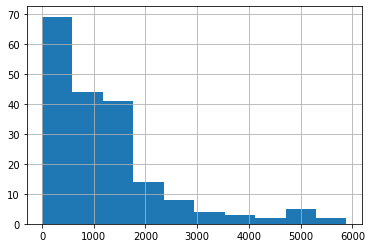

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
df_city_Comm_Merge['MF_0_14'].hist()

In [18]:
#check if any null in the dataframe
df_city_Comm_Merge.isnull().sum()

NAME          0
Quadrant      0
Sector        0
Type          0
Area          0
index         3
RES_CNT       3
PRSCH_CHLD    3
MF_0_14       3
dtype: int64

In [19]:
#check which three rows comes with 'Nan' so we can decide how to do next
df_city_Comm_Merge[df_city_Comm_Merge['MF_0_14'].isnull()]

NAME Quadrant  Sector         Type  Area  index  \
26              CFB CURRIE       SW    West  Residential   1.1    NaN   
27    CFB LINCOLN PARK PMQ       SW    West  Residential   0.4    NaN   
151  SCARBORO/SUNALTA WEST       SW  Centre  Residential   0.4    NaN   

     RES_CNT  PRSCH_CHLD  MF_0_14  
26       NaN         NaN      NaN  
27       NaN         NaN      NaN  
151      NaN         NaN      NaN

In [20]:
#we are going to drop those very small communities. 
df_city_Comm_Merge.dropna(subset=['MF_0_14'],axis=0,inplace=True)

In [22]:
#check again to see any null values
df_city_Comm_Merge.isnull().sum().sum()

0

So dataframe looks so far so good.

In [23]:
df_city_Comm_Merge.head()

NAME Quadrant     Sector         Type  Area  index  \
0                     ABBEYDALE    NE/SE  Northeast  Residential   1.7   79.0   
1                        ACADIA       SE      South  Residential   3.9  151.0   
2  ALBERT PARK/RADISSON HEIGHTS       SE       East  Residential   2.5   54.0   
3                      ALTADORE       SW     Centre  Residential   2.9  138.0   
4                APPLEWOOD PARK    SE/NE       East  Residential   1.6  212.0   

   RES_CNT  PRSCH_CHLD  MF_0_14  
0   5957.0       482.0   1312.0  
1  10520.0       698.0   1459.0  
2   6997.0       767.0   1358.0  
3   6942.0       681.0   1489.0  
4   6981.0       546.0   1280.0

At this stage, we have neighborhoods and population data. Let's continue...

#### 2.2.2 City of Calgary economic data were taken from history data as per the table on website as of (https://great-news.ca/demographics/). It served as a general reference. 


In [25]:
#Extracting neighborhood household income 
url = 'https://great-news.ca/demographics/'
html = requests.get(url).content
df_list_income = pd.read_html(html)
income = df_list_income[0]
income.head()        

Community Newsletter Name Median Household Income  \
0                       Abbeydale               -                 $55,345   
1                          Acadia          Acadia                 $46,089   
2  Albert Park / Radisson Heights               -                 $38,019   
3                        Altadore      The Source                 $53,786   
4                  Applewood Park               -                 $65,724   

   Median Age  Population 2014  Dwellings 2014 City Quadrant  \
0          34             6071            2031            SE   
1          42            10969            5067            SE   
2          37             6529            2936            SE   
3          37             9518            4537            SW   
4          33             6864            2228            SE   

  Median Home Sale Price  
0               $305,000  
1               $447,000  
2               $349,900  
3               $925,000  
4               $380,000

In [26]:
# #select columns of community name & median income only & then change the columns names accordingly and remove '$' in income column
income_select=income[['Community','Median Household Income']]
income_select.columns=['NAME','Median_income']
# #change the communicity anme from lowcase to all upper case so as to merge. 
income_select['NAME']=income_select['NAME'].str.upper()
#strrip the $ sign in the "median_income" column
income_select['Median_income']=income_select['Median_income'].str.strip('$')


C:\Users\jiaxia\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\jiaxia\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [27]:
#then remove the "," in income columns and change to float variable type
len=income_select.shape[0]
for i in range(len):
    new=income_select['Median_income'].str.split(',',expand=True)
    income_select['Income']=new[0]+new[1]
income_select['Income']=income_select['Income'].astype('float')
#drop the original columns with "object" columns
income_select.drop(['Median_income'],axis=1, inplace=True)

C:\Users\jiaxia\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\jiaxia\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jiaxia\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [28]:
#let us look at we have now
income_select.head()

NAME   Income
0                       ABBEYDALE  55345.0
1                          ACADIA  46089.0
2  ALBERT PARK / RADISSON HEIGHTS  38019.0
3                        ALTADORE  53786.0
4                  APPLEWOOD PARK  65724.0

In [29]:
#Check the prevous created dataframe to make sure neighborhood name columns to match our current income dataframe
df_city_Comm_Merge.head()

NAME Quadrant     Sector         Type  Area  index  \
0                     ABBEYDALE    NE/SE  Northeast  Residential   1.7   79.0   
1                        ACADIA       SE      South  Residential   3.9  151.0   
2  ALBERT PARK/RADISSON HEIGHTS       SE       East  Residential   2.5   54.0   
3                      ALTADORE       SW     Centre  Residential   2.9  138.0   
4                APPLEWOOD PARK    SE/NE       East  Residential   1.6  212.0   

   RES_CNT  PRSCH_CHLD  MF_0_14  
0   5957.0       482.0   1312.0  
1  10520.0       698.0   1459.0  
2   6997.0       767.0   1358.0  
3   6942.0       681.0   1489.0  
4   6981.0       546.0   1280.0

In [30]:
#then we will join the "income" dataframe to the previous neighborhood dataframe by left join. we are missing some income data so we will fill with average. 

df_city_Comm_Merge_income=pd.merge(df_city_Comm_Merge,income_select,on='NAME',how='left')


In [31]:
df_city_Comm_Merge_income.shape

(192, 10)

In [32]:
#check what we have got 
df_city_Comm_Merge_income.head()

NAME Quadrant     Sector         Type  Area  index  \
0                     ABBEYDALE    NE/SE  Northeast  Residential   1.7   79.0   
1                        ACADIA       SE      South  Residential   3.9  151.0   
2  ALBERT PARK/RADISSON HEIGHTS       SE       East  Residential   2.5   54.0   
3                      ALTADORE       SW     Centre  Residential   2.9  138.0   
4                APPLEWOOD PARK    SE/NE       East  Residential   1.6  212.0   

   RES_CNT  PRSCH_CHLD  MF_0_14   Income  
0   5957.0       482.0   1312.0  55345.0  
1  10520.0       698.0   1459.0  46089.0  
2   6997.0       767.0   1358.0      NaN  
3   6942.0       681.0   1489.0  53786.0  
4   6981.0       546.0   1280.0  65724.0

In [33]:
#replace 'NaN' of income in our selected neighborhood to be the average of the City income. 
df_city_Comm_Merge_income['Income'].replace(np.nan,income_select['Income'].mean(),inplace=True)
df_city_Comm_Merge_income.head()

NAME Quadrant     Sector         Type  Area  index  \
0                     ABBEYDALE    NE/SE  Northeast  Residential   1.7   79.0   
1                        ACADIA       SE      South  Residential   3.9  151.0   
2  ALBERT PARK/RADISSON HEIGHTS       SE       East  Residential   2.5   54.0   
3                      ALTADORE       SW     Centre  Residential   2.9  138.0   
4                APPLEWOOD PARK    SE/NE       East  Residential   1.6  212.0   

   RES_CNT  PRSCH_CHLD  MF_0_14        Income  
0   5957.0       482.0   1312.0  55345.000000  
1  10520.0       698.0   1459.0  46089.000000  
2   6997.0       767.0   1358.0  69124.944444  
3   6942.0       681.0   1489.0  53786.000000  
4   6981.0       546.0   1280.0  65724.000000

In [34]:
print('the count is NULL value in dataframe & community neighborhood',df_city_Comm_Merge_income.isnull().sum().sum(),df_city_Comm_Merge_income.shape[0])

the count is NULL value in dataframe & community neighborhood 0 192


So at this time we have income appended to our neighborhood data. Let's continue...

#### 2.2.3 City of Calgary crime & discoder open data (https://data.calgary.ca/Health-and-Safety/Community-Crime-and-Disorder-Statistics-to-be-arch/848s-4m4z). Data is uploaded in Githut for easy reference.

In [35]:
path='https://raw.githubusercontent.com/jeffjia2020/Coursera_Capstone/master/Community_Crime_and_Disorder_Statistics__to_be_archived_.csv'
crime=pd.read_csv(path)
crime.shape

(114848, 11)

This dataset are over 100,000 rows and each row basically represents a single crime/discorder occured in the past, 
Let us select the data of 2019 only for each community. We we need is do is:

* select 2019 data
* group data by community with crime counting.
* get latitude and longitude of each center of each community

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000153FF63FD08>]],
      dtype=object)

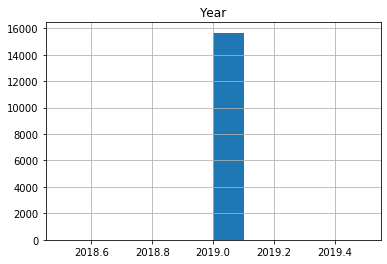

In [36]:
#this dataset are 100,000+ rows and data contains several years
#let us select the year 2019 only for each community with the total count. 
crime_2019=crime[(crime['Year']==2019)]
crime_2019.hist('Year') #make sure only 2019 exists

In [37]:
#sum the crime/disorder count in each community
crime_2019_Comm=crime_2019.groupby(['Community Name'])['Crime Count'].sum().reset_index()


In [38]:
crime_2019_Comm.head()

Community Name  Crime Count
0            01B           14
1            01C           18
2            01F            5
3            01G            1
4            01H            8

In [39]:
#Renaming column names to be consistent
crime_2019_Comm.columns=['NAME','CRIME_COUNT']

To work out center Latitude/Longitude of each community

In [40]:
#only choose those unique community name rows, 
Calgary_Comm_Latlong=crime_2019.drop_duplicates(subset='Community Name')
#drop the rest unneeded columns
Calgary_Comm_Latlong.drop(['Group Category','Category','Crime Count','Date','Year','Month','ID'],axis=1, inplace=True)
Calgary_Comm_Latlong

Sector Community Name  Resident Count  \
0      NORTHEAST      WHITEHORN           12019   
1           EAST      FOOTHILLS             317   
2          SOUTH         ACADIA           10520   
3      SOUTHEAST       MAHOGANY           11784   
4           WEST   LINCOLN PARK            2617   
...          ...            ...             ...   
18594      SOUTH            13A               0   
21169      SOUTH            13E               0   
24192  NORTHWEST            01G               0   
26262      SOUTH            13H               0   
27823       WEST            06B               0   

                          Community Center Point  
0       (51.08877341271908, -113.97006816364696)  
1       (50.99416606568998, -113.98198902398701)  
2      (50.972409209651765, -114.05369821963635)  
3       (50.89595849748311, -113.92452695887748)  
4        (51.0100906918158, -114.12955694059636)  
...                                          ...  
18594        (50.91413304515, -114.198192860264)  
21169    (50.8993917852468, -114.19822810239104)  
24192       (51.1169720361365, -114.28669528468)  
26262   (50.88851377100975, -114.11658911243751)  
27823    (51.07840967474864, -114.2299201348585)  

[271 rows x 4 columns]

In [41]:
#strip the () of column with Latitude/Longitdue data
Calgary_Comm_Latlong['Community Center Point']=Calgary_Comm_Latlong['Community Center Point'].str.strip('()')
#the column is separated at space ',', we need to split it and make two extra columns 
new=Calgary_Comm_Latlong['Community Center Point'].str.split(",", n = 1, expand = True) 
 
# making latitude column 
Calgary_Comm_Latlong['lat']= new[0] 
  
# making longitude column
Calgary_Comm_Latlong['long']= new[1] 
#drop the old column
Calgary_Comm_Latlong.drop('Community Center Point', axis=1,inplace=True)

#make commmunity column name to be 'NAME' in consistence with the rest for merging.
Calgary_Comm_Latlong.rename(columns={"Community Name":"NAME"}) 
Calgary_Comm_Latlong.head()

C:\Users\jiaxia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\jiaxia\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\jiaxia\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.p

Sector Community Name  Resident Count                 lat  \
0  NORTHEAST      WHITEHORN           12019   51.08877341271908   
1       EAST      FOOTHILLS             317   50.99416606568998   
2      SOUTH         ACADIA           10520  50.972409209651765   
3  SOUTHEAST       MAHOGANY           11784   50.89595849748311   
4       WEST   LINCOLN PARK            2617    51.0100906918158   

                   long  
0   -113.97006816364696  
1   -113.98198902398701  
2   -114.05369821963635  
3   -113.92452695887748  
4   -114.12955694059636

In [42]:
#name the column titles for consistence
Calgary_Comm_Latlong.columns=['Sector','NAME','Resident_Count','lat','long']
Calgary_Comm_Latlong.head()

Sector          NAME  Resident_Count                 lat  \
0  NORTHEAST     WHITEHORN           12019   51.08877341271908   
1       EAST     FOOTHILLS             317   50.99416606568998   
2      SOUTH        ACADIA           10520  50.972409209651765   
3  SOUTHEAST      MAHOGANY           11784   50.89595849748311   
4       WEST  LINCOLN PARK            2617    51.0100906918158   

                   long  
0   -113.97006816364696  
1   -113.98198902398701  
2   -114.05369821963635  
3   -113.92452695887748  
4   -114.12955694059636

In [43]:
# add latitude/longitude to the dataframe which has crime count of each community
crime_2019_Comm = crime_2019_Comm.join(Calgary_Comm_Latlong.set_index('NAME'), on='NAME')
crime_2019_Comm.head()

NAME  CRIME_COUNT     Sector  Resident_Count                lat  \
0  01B           14  NORTHWEST               0   51.1028260076277   
1  01C           18       WEST               0   51.0850032247371   
2  01F            5  NORTHWEST             319   51.1173481537355   
3  01G            1  NORTHWEST               0   51.1169720361365   
4  01H            8       WEST               0  51.09109619998551   

                   long  
0     -114.242479654669  
1     -114.238019739957  
2     -114.261186466354  
3      -114.28669528468  
4   -114.28274059879874

In [44]:
crime_2019_Comm.shape

(271, 6)

Many of the communities here are industry zones and we do not need all of them. Since we will join these crime data to our previously created dataframe (have residential neighborhoods & social-economic data) by only **official residential neighborhoods** specified by the City, so those extra industry zones will be excluded properly.


#### 2.2.4 Let us merge all acquired data together, from neighborhood locations, nationhood social, economic & crime counts (occurred in 2019) in one dataset

In [45]:
df_city_Comm_Merge_income.head(2)

NAME Quadrant     Sector         Type  Area  index  RES_CNT  \
0  ABBEYDALE    NE/SE  Northeast  Residential   1.7   79.0   5957.0   
1     ACADIA       SE      South  Residential   3.9  151.0  10520.0   

   PRSCH_CHLD  MF_0_14   Income  
0       482.0   1312.0  55345.0  
1       698.0   1459.0  46089.0

In [46]:
crime_2019_Comm.tail()

NAME  CRIME_COUNT  Sector  Resident_Count  \
266                WILLOW PARK          789   SOUTH            5328   
267               WINDSOR PARK          600  CENTRE            4584   
268  WINSTON HEIGHTS/MOUNTVIEW          624  CENTRE            3635   
269                   WOODBINE          367   SOUTH            8866   
270                  WOODLANDS          472   SOUTH            6002   

                    lat                  long  
266   50.95661926653037   -114.05620194518823  
267   51.00504575889471   -114.08355230577988  
268   51.07532495780659   -114.04185548061031  
269  50.939610852207664   -114.12962865374453  
270  50.941119997744266   -114.10634364849602

In [47]:
#merging dataframe by using official residential neighborhood names only.
df_City_Calgary=pd.merge(df_city_Comm_Merge_income,crime_2019_Comm,on='NAME',how='left')                         

In [48]:
#drop repeated columns and extra renaming
df_City_Calgary.drop(['Sector_y','Type','index','Resident_Count'],axis=1,inplace=True)

In [49]:
df_City_Calgary['lat']=df_City_Calgary['lat'].astype('float')
df_City_Calgary['long']=df_City_Calgary['long'].astype('float')

In [50]:
df_City_Calgary.head(2)

NAME Quadrant   Sector_x  Area  RES_CNT  PRSCH_CHLD  MF_0_14   Income  \
0  ABBEYDALE    NE/SE  Northeast   1.7   5957.0       482.0   1312.0  55345.0   
1     ACADIA       SE      South   3.9  10520.0       698.0   1459.0  46089.0   

   CRIME_COUNT        lat        long  
0          583  51.059520 -113.927794  
1         1656  50.972409 -114.053698

In [51]:
#change the name of the neighborhood Sector name to match the GeoJason file for viewing purpose
df_City_Calgary['sector']=df_City_Calgary['Sector_x'].str.upper()
df_City_Calgary.drop(['Sector_x'],axis=1,inplace=True)


In [52]:
#let us add a column. This may be the seaching radius for each neighborhood, which will be conducted later. Neighborhood area is in "Square-KM" and  
#then assuming we roughly treat neighborhood shape as a square shape, we can define customized searching radius column for each neighborhood as the below:

df_City_Calgary['radius']=np.sqrt(df_City_Calgary['Area'])/2*1000
df_City_Calgary['radius']=df_City_Calgary['radius'].astype(int)


In [53]:
df_City_Calgary.head()


NAME Quadrant  Area  RES_CNT  PRSCH_CHLD  MF_0_14  \
0                     ABBEYDALE    NE/SE   1.7   5957.0       482.0   1312.0   
1                        ACADIA       SE   3.9  10520.0       698.0   1459.0   
2  ALBERT PARK/RADISSON HEIGHTS       SE   2.5   6997.0       767.0   1358.0   
3                      ALTADORE       SW   2.9   6942.0       681.0   1489.0   
4                APPLEWOOD PARK    SE/NE   1.6   6981.0       546.0   1280.0   

         Income  CRIME_COUNT        lat        long     sector  radius  
0  55345.000000          583  51.059520 -113.927794  NORTHEAST     651  
1  46089.000000         1656  50.972409 -114.053698      SOUTH     987  
2  69124.944444         1784  51.044541 -113.996784       EAST     790  
3  53786.000000          591  51.015948 -114.100795     CENTRE     851  
4  65724.000000          501  51.044982 -113.927858       EAST     632

In [54]:
df_City_Calgary.shape

(192, 12)

Good, we have a City neighborhood location dataframe, which covering the entire city. 

City of Calgary also officially is divided into 8 Sectors, Let us create a Sector dataframe we can use also. 

In [56]:
##for viewing purpose, Let us generate the center LAT/LONG for each City Sector
sector_LatLong=df_City_Calgary[['lat','long','sector']].groupby(['sector']).mean()
sector_LatLong.head(2)

lat        long
sector                       
CENTRE  51.044331 -114.082841
EAST    51.038073 -113.967670

In [57]:
# add a column of community-number-counts 
sector_LatLong['Comm_Count']=df_City_Calgary.sector.value_counts()

In [58]:
##work out the popolation & children counts, crime for each City Sector.
df_City_Calgary_Sector_statistic=df_City_Calgary.groupby(['sector']).sum()
df_City_Calgary_Sector_statistic.reset_index(inplace=True)
#drop the wrong LAT/LONG columns since they are summed only
df_City_Calgary_Sector_statistic.drop(['lat','long'],axis=1,inplace=True)
#append the correct LAT/LONG for the center of each City Sector
df_City_Calgary_Sector_statistic=df_City_Calgary_Sector_statistic.join(sector_LatLong,on='sector')
#work our the the correct income for each Sector
df_City_Calgary_Sector_statistic['Average_Income']=df_City_Calgary_Sector_statistic['Income']/df_City_Calgary_Sector_statistic['Comm_Count']
df_City_Calgary_Sector_statistic.head()

sector  Area   RES_CNT  PRSCH_CHLD  MF_0_14        Income  CRIME_COUNT  \
0     CENTRE  61.5  196444.0     10294.0  23330.0  3.414961e+06        45829   
1       EAST  17.9   57641.0      4551.0  10549.0  5.096218e+05        10466   
2      NORTH  51.4  164220.0     14673.0  35000.0  1.325207e+06         7359   
3  NORTHEAST  46.6  182779.0     16202.0  38866.0  1.070568e+06        16273   
4  NORTHWEST  75.0  173810.0     10671.0  29729.0  1.504993e+06         9434   

   radius        lat        long  Comm_Count  Average_Income  
0   26894  51.044331 -114.082841          53    64433.216981  
1    6174  51.038073 -113.967670           9    56624.648148  
2   14799  51.141659 -114.095899          19    69747.733918  
3   14201  51.095775 -113.956866          18    59475.993827  
4   19219  51.108938 -114.174701          21    71666.328042

In [59]:
#making additional "crime counts/km**2" for each City Sector. This is one of business criteria
df_City_Calgary_Sector_statistic['crime-AreaRatio']=df_City_Calgary_Sector_statistic['CRIME_COUNT']/df_City_Calgary_Sector_statistic['Area']
#drop unnecessary columns
df_City_Calgary_Sector_statistic.drop('Income',axis=1,inplace=True)
df_City_Calgary_Sector_statistic.head()


sector  Area   RES_CNT  PRSCH_CHLD  MF_0_14  CRIME_COUNT  radius  \
0     CENTRE  61.5  196444.0     10294.0  23330.0        45829   26894   
1       EAST  17.9   57641.0      4551.0  10549.0        10466    6174   
2      NORTH  51.4  164220.0     14673.0  35000.0         7359   14799   
3  NORTHEAST  46.6  182779.0     16202.0  38866.0        16273   14201   
4  NORTHWEST  75.0  173810.0     10671.0  29729.0         9434   19219   

         lat        long  Comm_Count  Average_Income  crime-AreaRatio  
0  51.044331 -114.082841          53    64433.216981       745.186992  
1  51.038073 -113.967670           9    56624.648148       584.692737  
2  51.141659 -114.095899          19    69747.733918       143.171206  
3  51.095775 -113.956866          18    59475.993827       349.206009  
4  51.108938 -114.174701          21    71666.328042       125.786667

Great, now we have "two dataset", the first has all city residential neighborhoods while the other is City 8 official Sectors. Data columns contains neighborhood locations, social, economic & crime counts (occurred in 2019).

In [60]:
#save them in case needed.
df_City_Calgary.to_csv('df_City_Calgary.csv')
df_City_Calgary_Sector_statistic.to_csv('df_City_Calgary_Sector_statistic.csv')


In [ ]:
# loading (1/2) previously save files if crash 
# import pandas as pd
# df_City_Calgary=pd.read_csv('df_City_Calgary.csv',index_col=0)
# df_City_Calgary_Sector_statistic=pd.read_csv('df_City_Calgary_Sector_statistic.csv',index_col=0)

<a name="2-3"></a>

### 2.3 Let us view neighborhood candidates


In [61]:
#import libraries
import folium
print('Folium installed and imported!')

Folium installed and imported!


In [62]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

In [63]:
address = 'Calgary, AB'

geolocator = Nominatim(user_agent="Calgary_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Calgary City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Calgary City are 51.0534234, -114.0625892.


In [64]:
# create map and display our neighborhoods
Calgary_map = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, name in zip(df_City_Calgary['lat'], df_City_Calgary['long'], df_City_Calgary['NAME']):
    label = folium.Popup(name, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=3,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7).add_to(Calgary_map)
       
Calgary_map

And now to create a `Choropleth` map to display the social and enconoimical data features we have collected. we are using the official City Sector boundary GeoJason file.

In [65]:
# Calgary_geo_sector = r'CommunitySectors.geojson' # geojson sector file
Calgary_geo_sector_kids = 'https://raw.githubusercontent.com/jeffjia2020/Coursera_Capstone/master/CommunitySectors.geojson'

Calgary_map_sector_kids = folium.Map(location=[latitude, longitude], zoom_start=10, tiles='Mapbox Bright')

Calgary_geo_sector_crime = 'https://raw.githubusercontent.com/jeffjia2020/Coursera_Capstone/master/CommunitySectors.geojson'

Calgary_map_sector_crime = folium.Map(location=[latitude, longitude], zoom_start=10, tiles='Mapbox Bright')

Calgary_geo_sector_income = 'https://raw.githubusercontent.com/jeffjia2020/Coursera_Capstone/master/CommunitySectors.geojson'

Calgary_map_sector_income = folium.Map(location=[latitude, longitude], zoom_start=10, tiles='Mapbox Bright')

In [66]:
# generate choropleth for children in each Calgary Sector
Calgary_map_sector_kids.choropleth(
    geo_data=Calgary_geo_sector_kids, #this is Jason file
    data=df_City_Calgary_Sector_statistic, #this is the sector dataframe 
    columns=['sector','MF_0_14'],
    key_on='feature.properties.sector',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.5,
    legend_name='Children 0-14 counts'
)

Calgary_map_sector_kids

We can see suburb nieghborhoods are lived with most of young children, as this may be to be due to cheap housing or single family house types. 

Let's check crime ratio in each City Sector.

In [67]:
# generate choropleth map for Calgary Sector for crime statistic
Calgary_map_sector_crime.choropleth(
    geo_data=Calgary_geo_sector_crime, #this is Jason file
    data=df_City_Calgary_Sector_statistic, #this is the sector dataframe 
    columns=['sector','crime-AreaRatio'],
    key_on='feature.properties.sector',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.5,
    legend_name='Crime counts per km-square'
)

Calgary_map_sector_crime

so except the city **Center**, **East & North-East** Sectors, the rest neighborhoods seems about the same and family oriented of course. 

let's check average income status for each City Sector.

In [68]:
# generate choropleth map Calgary sector for income statistic
Calgary_map_sector_income.choropleth(
    geo_data=Calgary_geo_sector_income, #this is Jason file
    data=df_City_Calgary_Sector_statistic, #this is the sector dataframe 
    columns=['sector','Average_Income'],
    key_on='feature.properties.sector',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.5,
    legend_name='Average Househould Income'
)

Calgary_map_sector_income

It shows **south & West** have relative higher income and the household income is positively related to the crime rate. 

In [70]:
df_City_Calgary_Sector_statistic[['Average_Income','crime-AreaRatio']].corr

<bound method DataFrame.corr of    Average_Income  crime-AreaRatio
0    64433.216981       745.186992
1    56624.648148       584.692737
2    69747.733918       143.171206
3    59475.993827       349.206009
4    71666.328042       125.786667
5    77437.447368       171.456103
6    75997.171717       107.039848
7    76962.000000       126.962264>

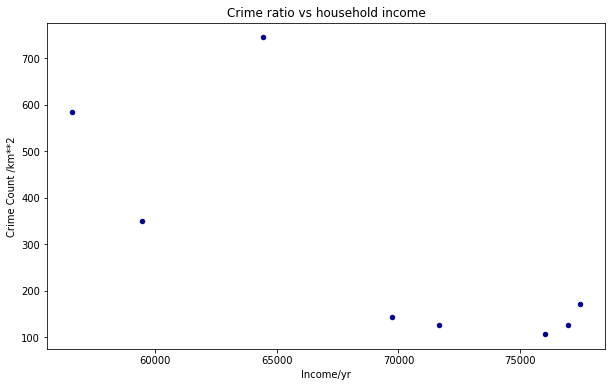

In [71]:
df_City_Calgary_Sector_statistic.plot(kind='scatter', x='Average_Income', y='crime-AreaRatio', figsize=(10, 6), color='darkblue')

plt.title('Crime ratio vs household income')
plt.xlabel('Income/yr')
plt.ylabel('Crime Count /km**2')

plt.show()

<a name="foursquare"></a> 

### 2.4 Foursquare

#### Now that we have our location candidates, let's use Foursquare API to get info on nearby venues in each neighborhood.



In [72]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [73]:
# the below is Foursquare credentials

CLIENT_ID = 'V02UOPVOXVPB3YMTOU0I0X3VHIA0QJJ3Q5XXRUQPCBYJ4UMK' # your Foursquare ID
CLIENT_SECRET = 'G4WMZYWQVBZL4KDO51THA5V0GSEQWY2UNYRTU4MNFJFOU3CL' # your Foursquare Secret
VERSION = '20180604'

By just reviewing seached results from default **location FourSquare API** (Tested but not included here), it is found there are a lot of food, airport and various venues, which are not related to our business problem at all. Instead of searching all venues for our neighborhood locations, we will focous on two big categories:
    **outdoors/recreation**
    **Art&entertainment**
See Foursquare web site for detail (https://developer.foursquare.com/docs/resources/categories):

In [74]:
#We will foccus on two categories related to recreation, including indoor things and outdoor as well, such as curling ice, pool...
Category1='4d4b7105d754a06377d81259'
Category2='4d4b7104d754a06370d81259' #Arts & Entertainment

#### Let us defind a function for our customized seach on each neighborhood and create a dateframe for these customized Venues

In [75]:
#define fucntion to search special categories

LIMIT=500

def getNearbyVenues(names, latitudes, longitudes, category, radius):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng,
            category,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


### Let us run the above speicific category seaching

In [77]:
##let us seach category-1, with a big radius so as to have all searched (duplicate venues will be dealt later)

LIMIT = 50

Calgary_venues_Cat1 = getNearbyVenues(df_City_Calgary['NAME'],
                                   df_City_Calgary['lat'],
                                   df_City_Calgary['long'],
                                   Category1,
                                   5000)


ABBEYDALE
ACADIA
ALBERT PARK/RADISSON HEIGHTS
ALTADORE
APPLEWOOD PARK
ARBOUR LAKE
ASPEN WOODS
AUBURN BAY
BANFF TRAIL
BANKVIEW
BAYVIEW
BEDDINGTON HEIGHTS
BEL-AIRE
BELTLINE
BONAVISTA DOWNS
BOWNESS
BRAESIDE
BRENTWOOD
BRIDGELAND/RIVERSIDE
BRIDLEWOOD
BRITANNIA
CAMBRIAN HEIGHTS
CANYON MEADOWS
CAPITOL HILL
CASTLERIDGE
CEDARBRAE
CHAPARRAL
CHARLESWOOD
CHINATOWN
CHINOOK PARK
CHRISTIE PARK
CITADEL
CLIFF BUNGALOW
COACH HILL
COLLINGWOOD
COPPERFIELD
CORAL SPRINGS
COUGAR RIDGE
COUNTRY HILLS
COUNTRY HILLS VILLAGE
COVENTRY HILLS
CRANSTON
CRESCENT HEIGHTS
CRESTMONT
DALHOUSIE
DEER RIDGE
DEER RUN
DIAMOND COVE
DISCOVERY RIDGE
DOUGLASDALE/GLEN
DOVER
DOWNTOWN COMMERCIAL CORE
DOWNTOWN EAST VILLAGE
DOWNTOWN WEST END
EAGLE RIDGE
EAU CLAIRE
EDGEMONT
ELBOW PARK
ELBOYA
ERIN WOODS
ERLTON
EVANSTON
EVERGREEN
FAIRVIEW
FALCONRIDGE
FOREST HEIGHTS
FOREST LAWN
GLAMORGAN
GLENBROOK
GLENDALE
GREENVIEW
GREENWOOD/GREENBRIAR
HAMPTONS
HARVEST HILLS
HAWKWOOD
HAYSBORO
HIDDEN VALLEY
HIGHLAND PARK
HIGHWOOD
HILLHURST
HOUNSFIELD HEIGH

In [78]:
Calgary_venues_Cat1.shape

(7813, 7)

In [ ]:
# Calgary_venues_Cat1.to_csv('Calgary_venues_7811_outdoors & recreation.csv')

In [79]:
##let us seach category-2, with a big radius so as to have all searched (duplicate venue will be dealt later)

LIMIT = 50

Calgary_venues_Cat2 = getNearbyVenues(df_City_Calgary['NAME'],
                                   df_City_Calgary['lat'],
                                   df_City_Calgary['long'],
                                   Category2,
                                   7000)




ABBEYDALE
ACADIA
ALBERT PARK/RADISSON HEIGHTS
ALTADORE
APPLEWOOD PARK
ARBOUR LAKE
ASPEN WOODS
AUBURN BAY
BANFF TRAIL
BANKVIEW
BAYVIEW
BEDDINGTON HEIGHTS
BEL-AIRE
BELTLINE
BONAVISTA DOWNS
BOWNESS
BRAESIDE
BRENTWOOD
BRIDGELAND/RIVERSIDE
BRIDLEWOOD
BRITANNIA
CAMBRIAN HEIGHTS
CANYON MEADOWS
CAPITOL HILL
CASTLERIDGE
CEDARBRAE
CHAPARRAL
CHARLESWOOD
CHINATOWN
CHINOOK PARK
CHRISTIE PARK
CITADEL
CLIFF BUNGALOW
COACH HILL
COLLINGWOOD
COPPERFIELD
CORAL SPRINGS
COUGAR RIDGE
COUNTRY HILLS
COUNTRY HILLS VILLAGE
COVENTRY HILLS
CRANSTON
CRESCENT HEIGHTS
CRESTMONT
DALHOUSIE
DEER RIDGE
DEER RUN
DIAMOND COVE
DISCOVERY RIDGE
DOUGLASDALE/GLEN
DOVER
DOWNTOWN COMMERCIAL CORE
DOWNTOWN EAST VILLAGE
DOWNTOWN WEST END
EAGLE RIDGE
EAU CLAIRE
EDGEMONT
ELBOW PARK
ELBOYA
ERIN WOODS
ERLTON
EVANSTON
EVERGREEN
FAIRVIEW
FALCONRIDGE
FOREST HEIGHTS
FOREST LAWN
GLAMORGAN
GLENBROOK
GLENDALE
GREENVIEW
GREENWOOD/GREENBRIAR
HAMPTONS
HARVEST HILLS
HAWKWOOD
HAYSBORO
HIDDEN VALLEY
HIGHLAND PARK
HIGHWOOD
HILLHURST
HOUNSFIELD HEIGH

In [80]:
Calgary_venues_Cat2.shape


(5374, 7)

In [ ]:
# Calgary_venues_Cat2.to_csv('Calgary_venues_5398line_art-zoo-waterpark.csv')

In [81]:
#let us concatenate two venue categories, which are related to sport, recreation, movie...
Calgary_venues=pd.concat([Calgary_venues_Cat1,Calgary_venues_Cat2])
Calgary_venues.shape

(13187, 7)

In [82]:
#let us check how many unique categories
Calgary_venues['Venue Category'].unique().shape
print('there are {} unique categories'.format(Calgary_venues['Venue Category'].unique().shape[0]))

there are 68 unique categories


In [83]:
#since we have searched using a large radius in order to get all recreation facilities, so inevitably we have many duplicated items, 
#for example, same Venue exists in more than one neighborhood. We need to get ride of that duplicates
Calgary_venues['Venue Category'].unique()
Calgary_venues.drop_duplicates(subset='Venue',keep='first',inplace=True)
Calgary_venues.shape


(513, 7)

In [84]:
Calgary_venues.to_csv('Calgary_venues_noDuplicate-512rows.csv')

Some **Venue** have nothing to do with our business, such as **dog Run**, **Golf course** and so forth, so let us get rid of them first.

Secondly, from the list of the categories, we found many similar or duplicated Venue Categories, such as **History Museum** and as wel as **Museum** all there. From our business requirements, let's just keep one out of these repeated items. 

In [85]:
#makeing the un-wanted list.
no_want_list=['Golf Course','Yoga Studio','Ski Lodge','Weight Loss Center','Boxing Gym','Beach','Boxing gym',\
              'Concert Hall','Dance Studio','Dog Run','Lake','Park','Plaza',\
              'River','Rock Club','Roof Deck','Scenic Lookout','Ski Area','Soccer Field',\
              'Theater','Track','Trail','Waterfall','Comedy Club','Gym','State / Provincial Park','Forest',\
              'Hockey Field','Baseball Field','Farm', 'Climbing Gym','Piano Bar','Playground', 'Paintball Field',\
              'Tennis Court','Stables','Golf Driving Range','Harbor / Marina',\
              'Amphitheater','Art Gallery','Arts & Entertainment','Athletics & Sports','Circus','Country Dance Club',\
              'Cycle Studio','Music Venue','Performing Arts Venue','Gym Pool','History Museum','Indie Movie Theater',\
              'Indie Theater','Martial Arts Dojo','Outdoor Sculpture', 'Pool','Skate Park','Sports Club']           

In [86]:
#remove those "unwanted" Venues
Calgary_venues_Clean=Calgary_venues

for i,no_want in enumerate(no_want_list):
    msk111=Calgary_venues_Clean['Venue Category']==no_want
    temp=Calgary_venues_Clean[~msk111]
    Calgary_venues_Clean=temp
  

In [87]:
Calgary_venues_Clean.head()
Calgary_venues_Clean['Venue Category'].unique()

array(['Gym / Fitness Center', 'Skating Rink', 'Recreation Center',
       'Hockey Rink', 'Garden', 'Indoor Play Area', 'Movie Theater',
       'Exhibit', 'Science Museum', 'Laser Tag', 'Multiplex', 'Museum',
       'Zoo Exhibit'], dtype=object)

In [88]:
Calgary_venues_Clean.shape

(104, 7)

In [ ]:
# instead of re-search venues, we can load the prevoius results after Kernel crashing...
# Calgary_venues_Clean.to_csv('Calgary_venues_Clean101rows-May11.csv')
# Calgary_venues_Clean=pd.read_csv(''Calgary_venues_Clean101rows-May11.csv'')

In [ ]:
# # data loading (2/2) previously saved data in case crash
# Calgary_venues_Clean=pd.read_csv('Calgary_venues_Clean101rows-May11.csv',index_col=0)
# Calgary_venues_Clean.head()

We have produced recreation venues, including pool, garden, indoor sport and for forth. Let's now see all the collected recreation venues in our area of interest on map.

In [90]:
# create map and display our Venues it
#we are going to use "blue cicle " for neighborhoods & "red circle" for indoor recreation venues.

Calgary_map = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat,lng,name in zip(Calgary_venues_Clean['Venue Latitude'], Calgary_venues_Clean['Venue Longitude'], Calgary_venues_Clean['Venue']):
    

#    label = folium.Popup('test', parse_html=True)

    label = folium.Popup(name, parse_html=True)

    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='red', 
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Calgary_map)
       
# Calgary_map


for lat, lng, name in zip(df_City_Calgary['lat'], df_City_Calgary['long'], df_City_Calgary['NAME']):
    label = folium.Popup(name, parse_html=True)
    folium.CircleMarker(
    [lat, lng],
    radius=1,
    popup=label,
    color='blue',
    fill=False,
    fill_color='#3186cc',
    fill_opacity=0.7).add_to(Calgary_map)
       
Calgary_map

In [91]:
print('so we have total {} categories & {} venues'.format(Calgary_venues_Clean['Venue Category'].unique().shape[0],Calgary_venues_Clean.shape[0]))

so we have total 13 categories & 104 venues


In [92]:
Calgary_venues_Clean.head(2)
Calgary_venues_Clean['Neighborhood'].unique().shape

(23,)

<a name="Data_Analysis"></a>

## 3: Data Analysis


Our main business goal of this project is to find areas in City of Calgary that have low recreation facilities, especially those with low number of indoor recreation centers or indoor fun-playing facilities for children ranging from 0~14, so that during the long winter young family can enjoy doing something.

Let's recap what we have done so far: in the first step, we have created neighborhood candidates with geographic location as well as social & economical data. Then we use these neighborhood location data to query indoor recreation venues closely related to our business needs according to Foursquare categorization list.
 

<img src="https://raw.githubusercontent.com/jeffjia2020/Coursera_Capstone/master/Calgary-socical-economic-updated-new.PNG" width="800">

Our next step will to generate heatmap from recreation venus to identify the interested **neighborhood/Sector** to meet our business needs. Figues above shows the resutls so far and the **heatmap**. 


Next approach is the quantify those data columns (**Features** interchangely called) in a scientific way so as to find out the optimum neighborhoods or location for the future recreation business. Main steps will include the following:


   * Select social & economic features.
   * concatenate to recreation venues dataframe.
   * normalize all features.
   * use our business goal (shareholders' requirements) criteria set out before to assign different weight for different features.
   * evaluate the total score of each neighborhood from all features.
   * clustering (using k-means clustering) of those neighborhood after features normalized.
   * Map presentation of the recommended business neighborhood and zones for stakeholders.
    

#### Heatmap

In [93]:
Calgary_venues_Clean.head()
#extract Latitude & Longitude
temp=Calgary_venues_Clean[['Neighborhood Latitude','Neighborhood Longitude']]
#Convert them into list of pair
Calgary_venues_Clean_LatLong=[[temp.iloc[i,0],temp.iloc[i,1]] for i in range(temp.shape[0])]


In [ ]:
# import requests

In [94]:
#reading the city Sector boundary file
Calgary_boroughs_url='https://raw.githubusercontent.com/jeffjia2020/Coursera_Capstone/master/CommunitySectors.geojson'
Calgary_boroughs = requests.get(Calgary_boroughs_url).json()

def boroughs_style(feature):
    return { 'color': 'blue', 'nofill': False }

In [95]:
from folium import plugins
from folium.plugins import HeatMap

Calgary_map = folium.Map(location=[latitude, longitude], zoom_start=12)
folium.TileLayer('cartodbpositron').add_to(Calgary_map) #cartodbpositron cartodbdark_matter
HeatMap(Calgary_venues_Clean_LatLong).add_to(Calgary_map)
#drawing circles around the city center
folium.Circle([latitude, longitude], radius=5000, fill=False, color='red').add_to(Calgary_map)
folium.Circle([latitude, longitude], radius=10000, fill=False, color='red').add_to(Calgary_map)
folium.GeoJson(Calgary_boroughs, style_function=boroughs_style, name='geojson').add_to(Calgary_map)           
Calgary_map


In [96]:
Calgary_venues_Clean.head()

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0     ABBEYDALE               51.05952             -113.927794   
1     ABBEYDALE               51.05952             -113.927794   
5     ABBEYDALE               51.05952             -113.927794   
12    ABBEYDALE               51.05952             -113.927794   
13    ABBEYDALE               51.05952             -113.927794   

                                 Venue  Venue Latitude  Venue Longitude  \
0   Bob Bahan Aquatic & Fitness Centre       51.041609      -113.964319   
1        Village Square Leisure Centre       51.075792      -113.954581   
5                   Booty Camp Fitness       51.062493      -113.940255   
12    Don Hartman Northeast Sportsplex       51.101868      -113.934078   
13           Sunridge Badminton Centre       51.055924      -113.987029   

          Venue Category  
0   Gym / Fitness Center  
1   Gym / Fitness Center  
5   Gym / Fitness Center  
12          Skating Rink  
13  Gym / Fitness Center

In [97]:
# one hot encoding
Calgary_venues_Clean_onehot = pd.get_dummies(Calgary_venues_Clean[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Calgary_venues_Clean_onehot['Neighborhood'] = Calgary_venues_Clean['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Calgary_venues_Clean_onehot.columns[-1]] + list(Calgary_venues_Clean_onehot.columns[:-1])
Calgary_venues_Clean_onehot = Calgary_venues_Clean_onehot[fixed_columns]

Calgary_venues_Clean_onehot.head()

Neighborhood  Exhibit  Garden  Gym / Fitness Center  Hockey Rink  \
0     ABBEYDALE        0       0                     1            0   
1     ABBEYDALE        0       0                     1            0   
5     ABBEYDALE        0       0                     1            0   
12    ABBEYDALE        0       0                     0            0   
13    ABBEYDALE        0       0                     1            0   

    Indoor Play Area  Laser Tag  Movie Theater  Multiplex  Museum  \
0                  0          0              0          0       0   
1                  0          0              0          0       0   
5                  0          0              0          0       0   
12                 0          0              0          0       0   
13                 0          0              0          0       0   

    Recreation Center  Science Museum  Skating Rink  Zoo Exhibit  
0                   0               0             0            0  
1                   0               0             0            0  
5                   0               0             0            0  
12                  0               0             1            0  
13                  0               0             0            0

In [98]:
Calgary_venues_Clean_onehot.columns

Index(['Neighborhood', 'Exhibit', 'Garden', 'Gym / Fitness Center',
       'Hockey Rink', 'Indoor Play Area', 'Laser Tag', 'Movie Theater',
       'Multiplex', 'Museum', 'Recreation Center', 'Science Museum',
       'Skating Rink', 'Zoo Exhibit'],
      dtype='object')

In [99]:
#group rows by neighborhood and taking the mean of frequency of occurence of each category
Calgary_venues_Clean_onehot_grouped=Calgary_venues_Clean_onehot.groupby(['Neighborhood']).mean().reset_index()
Calgary_venues_Clean_onehot_grouped.head()

Neighborhood   Exhibit    Garden  Gym / Fitness Center  \
0                     ABBEYDALE  0.133333  0.000000              0.466667   
1                        ACADIA  0.000000  0.058824              0.352941   
2  ALBERT PARK/RADISSON HEIGHTS  0.235294  0.000000              0.411765   
3                      ALTADORE  0.000000  0.000000              0.714286   
4                   ARBOUR LAKE  0.000000  0.000000              0.666667   

   Hockey Rink  Indoor Play Area  Laser Tag  Movie Theater  Multiplex  \
0     0.066667               0.0   0.000000       0.066667   0.000000   
1     0.117647               0.0   0.058824       0.058824   0.058824   
2     0.000000               0.0   0.000000       0.000000   0.000000   
3     0.000000               0.0   0.000000       0.142857   0.000000   
4     0.000000               0.0   0.000000       0.000000   0.000000   

     Museum  Recreation Center  Science Museum  Skating Rink  Zoo Exhibit  
0  0.000000           0.066667        0.066667      0.133333     0.000000  
1  0.117647           0.058824        0.000000      0.117647     0.000000  
2  0.235294           0.000000        0.058824      0.000000     0.058824  
3  0.000000           0.000000        0.000000      0.142857     0.000000  
4  0.000000           0.000000        0.000000      0.333333     0.000000

In [100]:
Calgary_venues_Clean_onehot_grouped.shape

(23, 14)

In [101]:
df_City_Calgary.head(2)

NAME Quadrant  Area  RES_CNT  PRSCH_CHLD  MF_0_14   Income  \
0  ABBEYDALE    NE/SE   1.7   5957.0       482.0   1312.0  55345.0   
1     ACADIA       SE   3.9  10520.0       698.0   1459.0  46089.0   

   CRIME_COUNT        lat        long     sector  radius  
0          583  51.059520 -113.927794  NORTHEAST     651  
1         1656  50.972409 -114.053698      SOUTH     987

Let'us extract combine all features 

In [102]:
#select social-economical features 
df_City_Calgary_select=df_City_Calgary[['NAME','MF_0_14','Income','CRIME_COUNT',]]
df_City_Calgary_select.columns=['Neighborhood','MF_0_14','Income','CRIME_COUNT',]
# #append these features to the grouped venues dataframe
Calgary_venues_plus=Calgary_venues_Clean_onehot_grouped
Calgary_venues_plus=Calgary_venues_plus.join(df_City_Calgary_select.set_index('Neighborhood'), on='Neighborhood')
Calgary_venues_plus.head(2)

Neighborhood   Exhibit    Garden  Gym / Fitness Center  Hockey Rink  \
0    ABBEYDALE  0.133333  0.000000              0.466667     0.066667   
1       ACADIA  0.000000  0.058824              0.352941     0.117647   

   Indoor Play Area  Laser Tag  Movie Theater  Multiplex    Museum  \
0               0.0   0.000000       0.066667   0.000000  0.000000   
1               0.0   0.058824       0.058824   0.058824  0.117647   

   Recreation Center  Science Museum  Skating Rink  Zoo Exhibit  MF_0_14  \
0           0.066667        0.066667      0.133333          0.0   1312.0   
1           0.058824        0.000000      0.117647          0.0   1459.0   

    Income  CRIME_COUNT  
0  55345.0          583  
1  46089.0         1656

In [103]:
Calgary_venues_plus.set_index('Neighborhood',inplace=True)
Calgary_venues_plus.head()

Exhibit    Garden  Gym / Fitness Center  \
Neighborhood                                                             
ABBEYDALE                     0.133333  0.000000              0.466667   
ACADIA                        0.000000  0.058824              0.352941   
ALBERT PARK/RADISSON HEIGHTS  0.235294  0.000000              0.411765   
ALTADORE                      0.000000  0.000000              0.714286   
ARBOUR LAKE                   0.000000  0.000000              0.666667   

                              Hockey Rink  Indoor Play Area  Laser Tag  \
Neighborhood                                                             
ABBEYDALE                        0.066667               0.0   0.000000   
ACADIA                           0.117647               0.0   0.058824   
ALBERT PARK/RADISSON HEIGHTS     0.000000               0.0   0.000000   
ALTADORE                         0.000000               0.0   0.000000   
ARBOUR LAKE                      0.000000               0.0   0.000000   

                              Movie Theater  Multiplex    Museum  \
Neighborhood                                                       
ABBEYDALE                          0.066667   0.000000  0.000000   
ACADIA                             0.058824   0.058824  0.117647   
ALBERT PARK/RADISSON HEIGHTS       0.000000   0.000000  0.235294   
ALTADORE                           0.142857   0.000000  0.000000   
ARBOUR LAKE                        0.000000   0.000000  0.000000   

                              Recreation Center  Science Museum  Skating Rink  \
Neighborhood                                                                    
ABBEYDALE                              0.066667        0.066667      0.133333   
ACADIA                                 0.058824        0.000000      0.117647   
ALBERT PARK/RADISSON HEIGHTS           0.000000        0.058824      0.000000   
ALTADORE                               0.000000        0.000000      0.142857   
ARBOUR LAKE                            0.000000        0.000000      0.333333   

                              Zoo Exhibit  MF_0_14        Income  CRIME_COUNT  
Neighborhood                                                                   
ABBEYDALE                        0.000000   1312.0  55345.000000          583  
ACADIA                           0.000000   1459.0  46089.000000         1656  
ALBERT PARK/RADISSON HEIGHTS     0.058824   1358.0  69124.944444         1784  
ALTADORE                         0.000000   1489.0  53786.000000          591  
ARBOUR LAKE                      0.000000   1557.0  70590.000000          842

let us start to normalize all features. There are various methods and we select the Z-score.

In [161]:
Calgary_venues_plus.shape

(23, 16)

In [104]:
#nomalize the data using Z-score
Calgary_venues_plus_Z=(Calgary_venues_plus-Calgary_venues_plus.mean())/Calgary_venues_plus.std()
Calgary_venues_plus_Z.head()

Exhibit    Garden  Gym / Fitness Center  \
Neighborhood                                                             
ABBEYDALE                     0.831895 -0.318320              0.067488   
ACADIA                       -0.328751 -0.060425             -0.219338   
ALBERT PARK/RADISSON HEIGHTS  1.719447 -0.318320             -0.070980   
ALTADORE                     -0.328751 -0.318320              0.692006   
ARBOUR LAKE                  -0.328751 -0.318320              0.571907   

                              Hockey Rink  Indoor Play Area  Laser Tag  \
Neighborhood                                                             
ABBEYDALE                       -0.098653         -0.208514  -0.208514   
ACADIA                           0.079041         -0.208514   4.587317   
ALBERT PARK/RADISSON HEIGHTS    -0.331023         -0.208514  -0.208514   
ALTADORE                        -0.331023         -0.208514  -0.208514   
ARBOUR LAKE                     -0.331023         -0.208514  -0.208514   

                              Movie Theater  Multiplex    Museum  \
Neighborhood                                                       
ABBEYDALE                         -0.009540   -0.23268 -0.284981   
ACADIA                            -0.046850    0.33065  1.899873   
ALBERT PARK/RADISSON HEIGHTS      -0.326675   -0.23268  4.084726   
ALTADORE                           0.352900   -0.23268 -0.284981   
ARBOUR LAKE                       -0.326675   -0.23268 -0.284981   

                              Recreation Center  Science Museum  Skating Rink  \
Neighborhood                                                                    
ABBEYDALE                             -0.068105        1.981179     -0.050399   
ACADIA                                -0.113619       -0.361485     -0.105048   
ALBERT PARK/RADISSON HEIGHTS          -0.454970        1.705571     -0.514914   
ALTADORE                              -0.454970       -0.361485     -0.017219   
ARBOUR LAKE                           -0.454970       -0.361485      0.646374   

                              Zoo Exhibit   MF_0_14    Income  CRIME_COUNT  
Neighborhood                                                                
ABBEYDALE                       -0.208514 -0.043393 -0.474763    -0.018644  
ACADIA                          -0.208514  0.086902 -0.761968     2.172410  
ALBERT PARK/RADISSON HEIGHTS     4.587317 -0.002621 -0.047183     2.433785  
ALTADORE                        -0.208514  0.113492 -0.523137    -0.002308  
ARBOUR LAKE                     -0.208514  0.173765 -0.001724     0.510231

With Z-score normalization applied to the dataset, each each column ( **features** interchangeable called) now has the same **weight** as the rest. To meet our business needs, higher important factor (i.e, **higher weight**) will be assigned to the neighborhoods with high density of children. Similarly,  if there is existing indoor play center, we would assign a **very lower weight** accordingly. **Weight** is in range of -1 (totally negative) to 1 (totally positive correlated to our business).

Let us assign different **Weight** to our data features.

In [105]:
#by using a factor from -1 to 1, let's try to assign negative value to those indoor playing facilities but positive to less crime & high density of children.
features_factor=[['Exhibit',-0.5], ['Garden',-0.5],['Gym / Fitness Center',-0.6], ['Hockey Rink',-0.5],\
       ['Indoor Play Area',-1], ['Laser Tag',-0.8], ['Movie Theater',-0.3], ['Multiplex',-0.7], ['Museum',-0.5],\
       ['Recreation Center',-0.8], ['Science Museum',-0.5],['Skating Rink',-0.6],['Zoo Exhibit',-0.5],\
       ['MF_0_14',0.9], ['Income',0.7], ['CRIME_COUNT',-0.7]]
# Create the pandas DataFrame 
df_features_factor = pd.DataFrame(features_factor,columns=['Features','Factor'])

df_features_factor.head()

Features  Factor
0               Exhibit    -0.5
1                Garden    -0.5
2  Gym / Fitness Center    -0.6
3           Hockey Rink    -0.5
4      Indoor Play Area    -1.0

In [163]:
Calgary_venues_plus.head()

Exhibit    Garden  Gym / Fitness Center  \
Neighborhood                                                             
ABBEYDALE                     0.133333  0.000000              0.466667   
ACADIA                        0.000000  0.058824              0.352941   
ALBERT PARK/RADISSON HEIGHTS  0.235294  0.000000              0.411765   
ALTADORE                      0.000000  0.000000              0.714286   
ARBOUR LAKE                   0.000000  0.000000              0.666667   

                              Hockey Rink  Indoor Play Area  Laser Tag  \
Neighborhood                                                             
ABBEYDALE                        0.066667               0.0   0.000000   
ACADIA                           0.117647               0.0   0.058824   
ALBERT PARK/RADISSON HEIGHTS     0.000000               0.0   0.000000   
ALTADORE                         0.000000               0.0   0.000000   
ARBOUR LAKE                      0.000000               0.0   0.000000   

                              Movie Theater  Multiplex    Museum  \
Neighborhood                                                       
ABBEYDALE                          0.066667   0.000000  0.000000   
ACADIA                             0.058824   0.058824  0.117647   
ALBERT PARK/RADISSON HEIGHTS       0.000000   0.000000  0.235294   
ALTADORE                           0.142857   0.000000  0.000000   
ARBOUR LAKE                        0.000000   0.000000  0.000000   

                              Recreation Center  Science Museum  Skating Rink  \
Neighborhood                                                                    
ABBEYDALE                              0.066667        0.066667      0.133333   
ACADIA                                 0.058824        0.000000      0.117647   
ALBERT PARK/RADISSON HEIGHTS           0.000000        0.058824      0.000000   
ALTADORE                               0.000000        0.000000      0.142857   
ARBOUR LAKE                            0.000000        0.000000      0.333333   

                              Zoo Exhibit  MF_0_14        Income  CRIME_COUNT  
Neighborhood                                                                   
ABBEYDALE                        0.000000   1312.0  55345.000000          583  
ACADIA                           0.000000   1459.0  46089.000000         1656  
ALBERT PARK/RADISSON HEIGHTS     0.058824   1358.0  69124.944444         1784  
ALTADORE                         0.000000   1489.0  53786.000000          591  
ARBOUR LAKE                      0.000000   1557.0  70590.000000          842

In [106]:
# applying those weight to dataset features
Calgary_venues_plus_Z_Weight=Calgary_venues_plus_Z*np.asarray(df_features_factor.Factor)
Calgary_venues_plus_Z_Weight.head()

Exhibit    Garden  Gym / Fitness Center  \
Neighborhood                                                             
ABBEYDALE                    -0.415947  0.159160             -0.040493   
ACADIA                        0.164375  0.030212              0.131603   
ALBERT PARK/RADISSON HEIGHTS -0.859724  0.159160              0.042588   
ALTADORE                      0.164375  0.159160             -0.415204   
ARBOUR LAKE                   0.164375  0.159160             -0.343144   

                              Hockey Rink  Indoor Play Area  Laser Tag  \
Neighborhood                                                             
ABBEYDALE                        0.049327          0.208514   0.166812   
ACADIA                          -0.039521          0.208514  -3.669854   
ALBERT PARK/RADISSON HEIGHTS     0.165512          0.208514   0.166812   
ALTADORE                         0.165512          0.208514   0.166812   
ARBOUR LAKE                      0.165512          0.208514   0.166812   

                              Movie Theater  Multiplex    Museum  \
Neighborhood                                                       
ABBEYDALE                          0.002862   0.162876  0.142490   
ACADIA                             0.014055  -0.231455 -0.949936   
ALBERT PARK/RADISSON HEIGHTS       0.098002   0.162876 -2.042363   
ALTADORE                          -0.105870   0.162876  0.142490   
ARBOUR LAKE                        0.098002   0.162876  0.142490   

                              Recreation Center  Science Museum  Skating Rink  \
Neighborhood                                                                    
ABBEYDALE                              0.054484       -0.990589      0.030239   
ACADIA                                 0.090895        0.180743      0.063029   
ALBERT PARK/RADISSON HEIGHTS           0.363976       -0.852786      0.308949   
ALTADORE                               0.363976        0.180743      0.010332   
ARBOUR LAKE                            0.363976        0.180743     -0.387825   

                              Zoo Exhibit   MF_0_14    Income  CRIME_COUNT  
Neighborhood                                                                
ABBEYDALE                        0.104257 -0.039054 -0.332334     0.013051  
ACADIA                           0.104257  0.078212 -0.533378    -1.520687  
ALBERT PARK/RADISSON HEIGHTS    -2.293659 -0.002358 -0.033028    -1.703650  
ALTADORE                         0.104257  0.102143 -0.366196     0.001616  
ARBOUR LAKE                      0.104257  0.156388 -0.001207    -0.357162

In [107]:
#Now, our dataframe has factored in with our business criteria. it is time to compare their scores 
Calgary_venues_plus_Z_Weight['Score']=Calgary_venues_plus_Z_Weight.sum(axis=1)
# Calgary_venues_plus_Z_Weight.sort_values(by='Score', ascending=False)
Calgary_venues_plus_Z_Weight.head()

Exhibit    Garden  Gym / Fitness Center  \
Neighborhood                                                             
ABBEYDALE                    -0.415947  0.159160             -0.040493   
ACADIA                        0.164375  0.030212              0.131603   
ALBERT PARK/RADISSON HEIGHTS -0.859724  0.159160              0.042588   
ALTADORE                      0.164375  0.159160             -0.415204   
ARBOUR LAKE                   0.164375  0.159160             -0.343144   

                              Hockey Rink  Indoor Play Area  Laser Tag  \
Neighborhood                                                             
ABBEYDALE                        0.049327          0.208514   0.166812   
ACADIA                          -0.039521          0.208514  -3.669854   
ALBERT PARK/RADISSON HEIGHTS     0.165512          0.208514   0.166812   
ALTADORE                         0.165512          0.208514   0.166812   
ARBOUR LAKE                      0.165512          0.208514   0.166812   

                              Movie Theater  Multiplex    Museum  \
Neighborhood                                                       
ABBEYDALE                          0.002862   0.162876  0.142490   
ACADIA                             0.014055  -0.231455 -0.949936   
ALBERT PARK/RADISSON HEIGHTS       0.098002   0.162876 -2.042363   
ALTADORE                          -0.105870   0.162876  0.142490   
ARBOUR LAKE                        0.098002   0.162876  0.142490   

                              Recreation Center  Science Museum  Skating Rink  \
Neighborhood                                                                    
ABBEYDALE                              0.054484       -0.990589      0.030239   
ACADIA                                 0.090895        0.180743      0.063029   
ALBERT PARK/RADISSON HEIGHTS           0.363976       -0.852786      0.308949   
ALTADORE                               0.363976        0.180743      0.010332   
ARBOUR LAKE                            0.363976        0.180743     -0.387825   

                              Zoo Exhibit   MF_0_14    Income  CRIME_COUNT  \
Neighborhood                                                                 
ABBEYDALE                        0.104257 -0.039054 -0.332334     0.013051   
ACADIA                           0.104257  0.078212 -0.533378    -1.520687   
ALBERT PARK/RADISSON HEIGHTS    -2.293659 -0.002358 -0.033028    -1.703650   
ALTADORE                         0.104257  0.102143 -0.366196     0.001616   
ARBOUR LAKE                      0.104257  0.156388 -0.001207    -0.357162   

                                 Score  
Neighborhood                            
ABBEYDALE                    -0.724345  
ACADIA                       -5.878936  
ALBERT PARK/RADISSON HEIGHTS -6.111179  
ALTADORE                      1.045536  
ARBOUR LAKE                   0.983769

In [108]:
Calgary_venues_Clean_grouped=Calgary_venues_Clean.groupby(['Neighborhood']).mean().reset_index()
# Calgary_venues_Clean_grouped.head()

In [109]:
#let's append location data to our Z-scored dataframe
Calgary_venues_plus_Z_Weight_LatLong=Calgary_venues_plus_Z_Weight
Calgary_venues_plus_Z_Weight_LatLong=Calgary_venues_plus_Z_Weight_LatLong.join(Calgary_venues_Clean_grouped.set_index('Neighborhood'), on='Neighborhood')
Calgary_venues_plus_Z_Weight_LatLong.head()

Exhibit    Garden  Gym / Fitness Center  \
Neighborhood                                                             
ABBEYDALE                    -0.415947  0.159160             -0.040493   
ACADIA                        0.164375  0.030212              0.131603   
ALBERT PARK/RADISSON HEIGHTS -0.859724  0.159160              0.042588   
ALTADORE                      0.164375  0.159160             -0.415204   
ARBOUR LAKE                   0.164375  0.159160             -0.343144   

                              Hockey Rink  Indoor Play Area  Laser Tag  \
Neighborhood                                                             
ABBEYDALE                        0.049327          0.208514   0.166812   
ACADIA                          -0.039521          0.208514  -3.669854   
ALBERT PARK/RADISSON HEIGHTS     0.165512          0.208514   0.166812   
ALTADORE                         0.165512          0.208514   0.166812   
ARBOUR LAKE                      0.165512          0.208514   0.166812   

                              Movie Theater  Multiplex    Museum  \
Neighborhood                                                       
ABBEYDALE                          0.002862   0.162876  0.142490   
ACADIA                             0.014055  -0.231455 -0.949936   
ALBERT PARK/RADISSON HEIGHTS       0.098002   0.162876 -2.042363   
ALTADORE                          -0.105870   0.162876  0.142490   
ARBOUR LAKE                        0.098002   0.162876  0.142490   

                              Recreation Center  ...  Skating Rink  \
Neighborhood                                     ...                 
ABBEYDALE                              0.054484  ...      0.030239   
ACADIA                                 0.090895  ...      0.063029   
ALBERT PARK/RADISSON HEIGHTS           0.363976  ...      0.308949   
ALTADORE                               0.363976  ...      0.010332   
ARBOUR LAKE                            0.363976  ...     -0.387825   

                              Zoo Exhibit   MF_0_14    Income  CRIME_COUNT  \
Neighborhood                                                                 
ABBEYDALE                        0.104257 -0.039054 -0.332334     0.013051   
ACADIA                           0.104257  0.078212 -0.533378    -1.520687   
ALBERT PARK/RADISSON HEIGHTS    -2.293659 -0.002358 -0.033028    -1.703650   
ALTADORE                         0.104257  0.102143 -0.366196     0.001616   
ARBOUR LAKE                      0.104257  0.156388 -0.001207    -0.357162   

                                 Score  Neighborhood Latitude  \
Neighborhood                                                    
ABBEYDALE                    -0.724345              51.059520   
ACADIA                       -5.878936              50.972409   
ALBERT PARK/RADISSON HEIGHTS -6.111179              51.044541   
ALTADORE                      1.045536              51.015948   
ARBOUR LAKE                   0.983769              51.132633   

                              Neighborhood Longitude  Venue Latitude  \
Neighborhood                                                           
ABBEYDALE                                -113.927794       51.059900   
ACADIA                                   -114.053698       50.971261   
ALBERT PARK/RADISSON HEIGHTS             -113.996784       51.047618   
ALTADORE                                 -114.100795       51.033217   
ARBOUR LAKE                              -114.207578       51.124861   

                              Venue Longitude  
Neighborhood                                   
ABBEYDALE                         -113.975841  
ACADIA                            -114.064392  
ALBERT PARK/RADISSON HEIGHTS      -114.046184  
ALTADORE                          -114.102376  
ARBOUR LAKE                       -114.202098  

[5 rows x 21 columns]

In [110]:
#some neighborhood has negative "score" due to lower income, lower number of children and high crime rate. let us set them to 0 just for viewing purpose
Calgary_venues_plus_Z_Weight_LatLong['newScore']=Calgary_venues_plus_Z_Weight_LatLong['Score'].apply(lambda x: 0 if x < 0.0 else x)

In [111]:
Calgary_venues_plus_Z_Weight_LatLong.head(2)

Exhibit    Garden  Gym / Fitness Center  Hockey Rink  \
Neighborhood                                                          
ABBEYDALE    -0.415947  0.159160             -0.040493     0.049327   
ACADIA        0.164375  0.030212              0.131603    -0.039521   

              Indoor Play Area  Laser Tag  Movie Theater  Multiplex    Museum  \
Neighborhood                                                                    
ABBEYDALE             0.208514   0.166812       0.002862   0.162876  0.142490   
ACADIA                0.208514  -3.669854       0.014055  -0.231455 -0.949936   

              Recreation Center  ...  Zoo Exhibit   MF_0_14    Income  \
Neighborhood                     ...                                    
ABBEYDALE              0.054484  ...     0.104257 -0.039054 -0.332334   
ACADIA                 0.090895  ...     0.104257  0.078212 -0.533378   

              CRIME_COUNT     Score  Neighborhood Latitude  \
Neighborhood                                                 
ABBEYDALE        0.013051 -0.724345              51.059520   
ACADIA          -1.520687 -5.878936              50.972409   

              Neighborhood Longitude  Venue Latitude  Venue Longitude  \
Neighborhood                                                            
ABBEYDALE                -113.927794       51.059900      -113.975841   
ACADIA                   -114.053698       50.971261      -114.064392   

              newScore  
Neighborhood            
ABBEYDALE          0.0  
ACADIA             0.0  

[2 rows x 22 columns]

#### Let's view the  neighborhood scores by taking consideration of both nearby recreation venues & social-economical data, as defined in our business problem before.

In [132]:
# Make map with variable cirle marker sized by "score value"
Calgary_map_score = folium.Map(location=[latitude, longitude], zoom_start=12)
 
# add marker one by one on the map
for i in range(0,Calgary_venues_plus_Z_Weight_LatLong.shape[0]):
    folium.Circle(
      location=[Calgary_venues_plus_Z_Weight_LatLong.iloc[i]['Neighborhood Latitude'], Calgary_venues_plus_Z_Weight_LatLong.iloc[i]['Neighborhood Longitude']],
      popup=Calgary_venues_plus_Z_Weight_LatLong.index.values[i],
      radius=(Calgary_venues_plus_Z_Weight_LatLong.iloc[i]['newScore'])*400,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(Calgary_map_score)

Calgary_map_score


#### The circle size is represented by the neighborhood score, which are related to our business problem. It seems the City South & South East sectors are the answer. further more, let us using K-Means clustering  machine learning to seperate the neighborhood.  

Let us cluster the neightborhood using K-Means machine learning to see what we will get...

In [133]:
#check what dataset we are dealing with
Calgary_venues_plus_Z_Weight.reset_index(inplace=True)
Calgary_venues_plus_Z_Weight.head()

Neighborhood   Exhibit    Garden  Gym / Fitness Center  \
0                     ABBEYDALE -0.415947  0.159160             -0.040493   
1                        ACADIA  0.164375  0.030212              0.131603   
2  ALBERT PARK/RADISSON HEIGHTS -0.859724  0.159160              0.042588   
3                      ALTADORE  0.164375  0.159160             -0.415204   
4                   ARBOUR LAKE  0.164375  0.159160             -0.343144   

   Hockey Rink  Indoor Play Area  Laser Tag  Movie Theater  Multiplex  \
0     0.049327          0.208514   0.166812       0.002862   0.162876   
1    -0.039521          0.208514  -3.669854       0.014055  -0.231455   
2     0.165512          0.208514   0.166812       0.098002   0.162876   
3     0.165512          0.208514   0.166812      -0.105870   0.162876   
4     0.165512          0.208514   0.166812       0.098002   0.162876   

     Museum  Recreation Center  Science Museum  Skating Rink  Zoo Exhibit  \
0  0.142490           0.054484       -0.990589      0.030239     0.104257   
1 -0.949936           0.090895        0.180743      0.063029     0.104257   
2 -2.042363           0.363976       -0.852786      0.308949    -2.293659   
3  0.142490           0.363976        0.180743      0.010332     0.104257   
4  0.142490           0.363976        0.180743     -0.387825     0.104257   

    MF_0_14    Income  CRIME_COUNT     Score  
0 -0.039054 -0.332334     0.013051 -0.724345  
1  0.078212 -0.533378    -1.520687 -5.878936  
2 -0.002358 -0.033028    -1.703650 -6.111179  
3  0.102143 -0.366196     0.001616  1.045536  
4  0.156388 -0.001207    -0.357162  0.983769

In [134]:
#preparing the data for k-means clustering
Calgary_Neighborhood_clustering=Calgary_venues_plus_Z_Weight
Calgary_Neighborhood_clustering.drop(['Neighborhood','Score'],axis=1, inplace=True)
Calgary_Neighborhood_clustering.head()

Exhibit    Garden  Gym / Fitness Center  Hockey Rink  Indoor Play Area  \
0 -0.415947  0.159160             -0.040493     0.049327          0.208514   
1  0.164375  0.030212              0.131603    -0.039521          0.208514   
2 -0.859724  0.159160              0.042588     0.165512          0.208514   
3  0.164375  0.159160             -0.415204     0.165512          0.208514   
4  0.164375  0.159160             -0.343144     0.165512          0.208514   

   Laser Tag  Movie Theater  Multiplex    Museum  Recreation Center  \
0   0.166812       0.002862   0.162876  0.142490           0.054484   
1  -3.669854       0.014055  -0.231455 -0.949936           0.090895   
2   0.166812       0.098002   0.162876 -2.042363           0.363976   
3   0.166812      -0.105870   0.162876  0.142490           0.363976   
4   0.166812       0.098002   0.162876  0.142490           0.363976   

   Science Museum  Skating Rink  Zoo Exhibit   MF_0_14    Income  CRIME_COUNT  
0       -0.990589      0.030239     0.104257 -0.039054 -0.332334     0.013051  
1        0.180743      0.063029     0.104257  0.078212 -0.533378    -1.520687  
2       -0.852786      0.308949    -2.293659 -0.002358 -0.033028    -1.703650  
3        0.180743      0.010332     0.104257  0.102143 -0.366196     0.001616  
4        0.180743     -0.387825     0.104257  0.156388 -0.001207    -0.357162

In [135]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [136]:
#run k-means to do the clustering into 5 clusters, tested and found this is appropriate. 
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Calgary_Neighborhood_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:21] 

array([1, 2, 2, 1, 1, 1, 4, 2, 1, 3, 0, 2, 1, 4, 2, 1, 1, 1, 1, 1, 4])

In [137]:
Calgary_venues_plus_Z_Weight_LatLong.head()

Exhibit    Garden  Gym / Fitness Center  \
Neighborhood                                                             
ABBEYDALE                    -0.415947  0.159160             -0.040493   
ACADIA                        0.164375  0.030212              0.131603   
ALBERT PARK/RADISSON HEIGHTS -0.859724  0.159160              0.042588   
ALTADORE                      0.164375  0.159160             -0.415204   
ARBOUR LAKE                   0.164375  0.159160             -0.343144   

                              Hockey Rink  Indoor Play Area  Laser Tag  \
Neighborhood                                                             
ABBEYDALE                        0.049327          0.208514   0.166812   
ACADIA                          -0.039521          0.208514  -3.669854   
ALBERT PARK/RADISSON HEIGHTS     0.165512          0.208514   0.166812   
ALTADORE                         0.165512          0.208514   0.166812   
ARBOUR LAKE                      0.165512          0.208514   0.166812   

                              Movie Theater  Multiplex    Museum  \
Neighborhood                                                       
ABBEYDALE                          0.002862   0.162876  0.142490   
ACADIA                             0.014055  -0.231455 -0.949936   
ALBERT PARK/RADISSON HEIGHTS       0.098002   0.162876 -2.042363   
ALTADORE                          -0.105870   0.162876  0.142490   
ARBOUR LAKE                        0.098002   0.162876  0.142490   

                              Recreation Center  ...  Zoo Exhibit   MF_0_14  \
Neighborhood                                     ...                          
ABBEYDALE                              0.054484  ...     0.104257 -0.039054   
ACADIA                                 0.090895  ...     0.104257  0.078212   
ALBERT PARK/RADISSON HEIGHTS           0.363976  ...    -2.293659 -0.002358   
ALTADORE                               0.363976  ...     0.104257  0.102143   
ARBOUR LAKE                            0.363976  ...     0.104257  0.156388   

                                Income  CRIME_COUNT     Score  \
Neighborhood                                                    
ABBEYDALE                    -0.332334     0.013051 -0.724345   
ACADIA                       -0.533378    -1.520687 -5.878936   
ALBERT PARK/RADISSON HEIGHTS -0.033028    -1.703650 -6.111179   
ALTADORE                     -0.366196     0.001616  1.045536   
ARBOUR LAKE                  -0.001207    -0.357162  0.983769   

                              Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                                  
ABBEYDALE                                 51.059520             -113.927794   
ACADIA                                    50.972409             -114.053698   
ALBERT PARK/RADISSON HEIGHTS              51.044541             -113.996784   
ALTADORE                                  51.015948             -114.100795   
ARBOUR LAKE                               51.132633             -114.207578   

                              Venue Latitude  Venue Longitude  newScore  
Neighborhood                                                             
ABBEYDALE                          51.059900      -113.975841  0.000000  
ACADIA                             50.971261      -114.064392  0.000000  
ALBERT PARK/RADISSON HEIGHTS       51.047618      -114.046184  0.000000  
ALTADORE                           51.033217      -114.102376  1.045536  
ARBOUR LAKE                        51.124861      -114.202098  0.983769  

[5 rows x 22 columns]

In [138]:
# add clustering labels to the clearned venue dataset
Calgary_venues_plus_Z_Weight_LatLong_Cluster=Calgary_venues_plus_Z_Weight_LatLong
Calgary_venues_plus_Z_Weight_LatLong_Cluster.insert(0, 'Cluster Labels', kmeans.labels_)
Calgary_venues_plus_Z_Weight_LatLong_Cluster

Cluster Labels   Exhibit    Garden  \
Neighborhood                                                       
ABBEYDALE                                  1 -0.415947  0.159160   
ACADIA                                     2  0.164375  0.030212   
ALBERT PARK/RADISSON HEIGHTS               2 -0.859724  0.159160   
ALTADORE                                   1  0.164375  0.159160   
ARBOUR LAKE                                1  0.164375  0.159160   
ASPEN WOODS                                1  0.164375  0.159160   
AUBURN BAY                                 4  0.164375  0.159160   
BANFF TRAIL                                2  0.164375  0.159160   
BAYVIEW                                    1  0.164375  0.159160   
BEDDINGTON HEIGHTS                         3  0.164375 -0.084408   
BONAVISTA DOWNS                            0  0.164375 -0.936895   
BOWNESS                                    2  0.164375  0.159160   
BRAESIDE                                   1  0.164375  0.159160   
BRIDLEWOOD                                 4  0.164375  0.159160   
CANYON MEADOWS                             2  0.164375  0.159160   
CASTLERIDGE                                1  0.164375  0.159160   
CEDARBRAE                                  1  0.164375  0.159160   
COUNTRY HILLS VILLAGE                      1  0.164375  0.159160   
DALHOUSIE                                  1  0.164375  0.159160   
DEER RIDGE                                 1  0.164375  0.159160   
ERIN WOODS                                 4 -2.011835  0.159160   
LINCOLN PARK                               1  0.164375 -2.032950   
NORTH HAVEN UPPER                          1  0.164375  0.159160   

                              Gym / Fitness Center  Hockey Rink  \
Neighborhood                                                      
ABBEYDALE                                -0.040493     0.049327   
ACADIA                                    0.131603    -0.039521   
ALBERT PARK/RADISSON HEIGHTS              0.042588     0.165512   
ALTADORE                                 -0.415204     0.165512   
ARBOUR LAKE                              -0.343144     0.165512   
ASPEN WOODS                              -0.242260     0.165512   
AUBURN BAY                               -0.242260     0.165512   
BANFF TRAIL                               0.665693     0.165512   
BAYVIEW                                   0.665693    -1.577263   
BEDDINGTON HEIGHTS                        0.329414     0.165512   
BONAVISTA DOWNS                           0.665693     0.165512   
BOWNESS                                  -0.469249     0.165512   
BRAESIDE                                 -0.847563     0.165512   
BRIDLEWOOD                                0.161274     0.165512   
CANYON MEADOWS                            0.665693     0.165512   
CASTLERIDGE                              -0.847563     0.165512   
CEDARBRAE                                -0.847563     0.165512   
COUNTRY HILLS VILLAGE                     0.665693     0.165512   
DALHOUSIE                                 0.665693    -1.577263   
DEER RIDGE                               -0.847563     0.165512   
ERIN WOODS                                0.665693     0.165512   
LINCOLN PARK                              0.665693     0.165512   
NORTH HAVEN UPPER                        -0.847563     0.165512   

                              Indoor Play Area  Laser Tag  Movie Theater  \
Neighborhood                                                               
ABBEYDALE                             0.208514   0.166812       0.002862   
ACADIA                                0.208514  -3.669854       0.014055   
ALBERT PARK/RADISSON HEIGHTS          0.208514   0.166812       0.098002   
ALTADORE                              0.208514   0.166812      -0.105870   
ARBOUR LAKE                           0.208514   0.166812       0.098002   
ASPEN WOODS                           0.208514   0.166812       0.098002   
AUBURN BAY                            0.20851

In [139]:
Calgary_venues_plus_Z_Weight_LatLong_Cluster.reset_index(inplace=True)
Calgary_venues_plus_Z_Weight_LatLong_Cluster.head()

Neighborhood  Cluster Labels   Exhibit    Garden  \
0                     ABBEYDALE               1 -0.415947  0.159160   
1                        ACADIA               2  0.164375  0.030212   
2  ALBERT PARK/RADISSON HEIGHTS               2 -0.859724  0.159160   
3                      ALTADORE               1  0.164375  0.159160   
4                   ARBOUR LAKE               1  0.164375  0.159160   

   Gym / Fitness Center  Hockey Rink  Indoor Play Area  Laser Tag  \
0             -0.040493     0.049327          0.208514   0.166812   
1              0.131603    -0.039521          0.208514  -3.669854   
2              0.042588     0.165512          0.208514   0.166812   
3             -0.415204     0.165512          0.208514   0.166812   
4             -0.343144     0.165512          0.208514   0.166812   

   Movie Theater  Multiplex  ...  Zoo Exhibit   MF_0_14    Income  \
0       0.002862   0.162876  ...     0.104257 -0.039054 -0.332334   
1       0.014055  -0.231455  ...     0.104257  0.078212 -0.533378   
2       0.098002   0.162876  ...    -2.293659 -0.002358 -0.033028   
3      -0.105870   0.162876  ...     0.104257  0.102143 -0.366196   
4       0.098002   0.162876  ...     0.104257  0.156388 -0.001207   

   CRIME_COUNT     Score  Neighborhood Latitude  Neighborhood Longitude  \
0     0.013051 -0.724345              51.059520             -113.927794   
1    -1.520687 -5.878936              50.972409             -114.053698   
2    -1.703650 -6.111179              51.044541             -113.996784   
3     0.001616  1.045536              51.015948             -114.100795   
4    -0.357162  0.983769              51.132633             -114.207578   

   Venue Latitude  Venue Longitude  newScore  
0       51.059900      -113.975841  0.000000  
1       50.971261      -114.064392  0.000000  
2       51.047618      -114.046184  0.000000  
3       51.033217      -114.102376  1.045536  
4       51.124861      -114.202098  0.983769  

[5 rows x 24 columns]

let us view these cluster on map 

In [140]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [156]:
#visualizing the cluster results 
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
# colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
colors_array = cm.rainbow(np.linspace(0, 1, 5))

rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Calgary_venues_plus_Z_Weight_LatLong_Cluster['Neighborhood Latitude'], Calgary_venues_plus_Z_Weight_LatLong_Cluster['Neighborhood Longitude'], Calgary_venues_plus_Z_Weight_LatLong_Cluster['Neighborhood'], Calgary_venues_plus_Z_Weight_LatLong_Cluster['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters




In [142]:
Calgary_venues_plus_Z_Weight_LatLong_Cluster.head()

Neighborhood  Cluster Labels   Exhibit    Garden  \
0                     ABBEYDALE               1 -0.415947  0.159160   
1                        ACADIA               2  0.164375  0.030212   
2  ALBERT PARK/RADISSON HEIGHTS               2 -0.859724  0.159160   
3                      ALTADORE               1  0.164375  0.159160   
4                   ARBOUR LAKE               1  0.164375  0.159160   

   Gym / Fitness Center  Hockey Rink  Indoor Play Area  Laser Tag  \
0             -0.040493     0.049327          0.208514   0.166812   
1              0.131603    -0.039521          0.208514  -3.669854   
2              0.042588     0.165512          0.208514   0.166812   
3             -0.415204     0.165512          0.208514   0.166812   
4             -0.343144     0.165512          0.208514   0.166812   

   Movie Theater  Multiplex  ...  Zoo Exhibit   MF_0_14    Income  \
0       0.002862   0.162876  ...     0.104257 -0.039054 -0.332334   
1       0.014055  -0.231455  ...     0.104257  0.078212 -0.533378   
2       0.098002   0.162876  ...    -2.293659 -0.002358 -0.033028   
3      -0.105870   0.162876  ...     0.104257  0.102143 -0.366196   
4       0.098002   0.162876  ...     0.104257  0.156388 -0.001207   

   CRIME_COUNT     Score  Neighborhood Latitude  Neighborhood Longitude  \
0     0.013051 -0.724345              51.059520             -113.927794   
1    -1.520687 -5.878936              50.972409             -114.053698   
2    -1.703650 -6.111179              51.044541             -113.996784   
3     0.001616  1.045536              51.015948             -114.100795   
4    -0.357162  0.983769              51.132633             -114.207578   

   Venue Latitude  Venue Longitude  newScore  
0       51.059900      -113.975841  0.000000  
1       50.971261      -114.064392  0.000000  
2       51.047618      -114.046184  0.000000  
3       51.033217      -114.102376  1.045536  
4       51.124861      -114.202098  0.983769  

[5 rows x 24 columns]

In [158]:
Calgary_venues_plus_Z_Weight_LatLong_Cluster.to_csv('Calgary_venues_plus_Z_Weight_LatLong_Cluster.csv')

In [144]:
df=Calgary_venues_plus_Z_Weight_LatLong_Cluster

In [145]:
#cluster 1
df.loc[df['Cluster Labels'] == 0, df.columns[[0] + list(range(3, df.shape[1]-5))]]

Neighborhood    Garden  Gym / Fitness Center  Hockey Rink  \
10  BONAVISTA DOWNS -0.936895              0.665693     0.165512   

    Indoor Play Area  Laser Tag  Movie Theater  Multiplex   Museum  \
10          0.208514   0.166812       0.098002  -3.188939  0.14249   

    Recreation Center  Science Museum  Skating Rink  Zoo Exhibit   MF_0_14  \
10           0.363976        0.180743      0.308949     0.104257 -0.963614   

      Income  CRIME_COUNT     Score  
10  0.241432     0.763482 -1.515211

In [159]:
#cluster 2
df.loc[df['Cluster Labels'] == 1, df.columns[[0] + list(range(3, df.shape[1]-5))]].head()

Neighborhood   Garden  Gym / Fitness Center  Hockey Rink  Indoor Play Area  \
0    ABBEYDALE  0.15916             -0.040493     0.049327          0.208514   
3     ALTADORE  0.15916             -0.415204     0.165512          0.208514   
4  ARBOUR LAKE  0.15916             -0.343144     0.165512          0.208514   
5  ASPEN WOODS  0.15916             -0.242260     0.165512          0.208514   
8      BAYVIEW  0.15916              0.665693    -1.577263          0.208514   

   Laser Tag  Movie Theater  Multiplex   Museum  Recreation Center  \
0   0.166812       0.002862   0.162876  0.14249           0.054484   
3   0.166812      -0.105870   0.162876  0.14249           0.363976   
4   0.166812       0.098002   0.162876  0.14249           0.363976   
5   0.166812       0.098002   0.162876  0.14249          -0.564500   
8   0.166812       0.098002   0.162876  0.14249           0.363976   

   Science Museum  Skating Rink  Zoo Exhibit   MF_0_14    Income  CRIME_COUNT  \
0       -0.990589      0.030239     0.104257 -0.039054 -0.332334     0.013051   
3        0.180743      0.010332     0.104257  0.102143 -0.366196     0.001616   
4        0.180743     -0.387825     0.104257  0.156388 -0.001207    -0.357162   
5        0.180743     -0.109115     0.104257  0.916618  1.374757     0.500474   
8        0.180743      0.308949     0.104257 -0.997917  2.470420     0.744900   

      Score  
0 -0.724345  
3  1.045536  
4  0.983769  
5  3.428716  
8  3.365988

In [147]:
#cluster 3
df.loc[df['Cluster Labels'] == 2, df.columns[[0] + list(range(3, df.shape[1]-5))]]

Neighborhood    Garden  Gym / Fitness Center  Hockey Rink  \
1                         ACADIA  0.030212              0.131603    -0.039521   
2   ALBERT PARK/RADISSON HEIGHTS  0.159160              0.042588     0.165512   
7                    BANFF TRAIL  0.159160              0.665693     0.165512   
11                       BOWNESS  0.159160             -0.469249     0.165512   
14                CANYON MEADOWS  0.159160              0.665693     0.165512   

    Indoor Play Area  Laser Tag  Movie Theater  Multiplex    Museum  \
1           0.208514  -3.669854       0.014055  -0.231455 -0.949936   
2           0.208514   0.166812       0.098002   0.162876 -2.042363   
7           0.208514   0.166812       0.098002   0.162876  0.142490   
11          0.208514   0.166812       0.098002   0.162876  0.142490   
14          0.208514   0.166812       0.098002   0.162876  0.142490   

    Recreation Center  Science Museum  Skating Rink  Zoo Exhibit   MF_0_14  \
1            0.090895        0.180743      0.063029     0.104257  0.078212   
2            0.363976       -0.852786      0.308949    -2.293659 -0.002358   
7            0.363976        0.180743     -1.781371     0.104257 -0.701164   
11           0.363976        0.180743     -0.213631     0.104257  0.307956   
14           0.363976        0.180743     -1.781371     0.104257 -0.166689   

      Income  CRIME_COUNT     Score  
1  -0.533378    -1.520687 -5.878936  
2  -0.033028    -1.703650 -6.111179  
7  -0.448516    -0.181346 -0.529987  
11 -0.655468    -1.562140 -0.675814  
14 -0.083809     0.203160  0.753701

In [148]:
#cluster 4
df.loc[df['Cluster Labels'] == 3, df.columns[[0] + list(range(3, df.shape[1]-5))]]

Neighborhood    Garden  Gym / Fitness Center  Hockey Rink  \
9  BEDDINGTON HEIGHTS -0.084408              0.329414     0.165512   

   Indoor Play Area  Laser Tag  Movie Theater  Multiplex   Museum  \
9         -4.587317   0.166812      -0.060565   0.162876  0.14249   

   Recreation Center  Science Museum  Skating Rink  Zoo Exhibit   MF_0_14  \
9          -0.151844       -1.771477     -0.155567     0.104257  0.651774   

     Income  CRIME_COUNT     Score  
9 -0.298972    -0.087007 -5.309645

In [149]:
#cluster 5
df.loc[df['Cluster Labels'] == 4, df.columns[[0] + list(range(3, df.shape[1]-5))]]

Neighborhood   Garden  Gym / Fitness Center  Hockey Rink  Indoor Play Area  \
6    AUBURN BAY  0.15916             -0.242260     0.165512          0.208514   
13   BRIDLEWOOD  0.15916              0.161274     0.165512          0.208514   
20   ERIN WOODS  0.15916              0.665693     0.165512          0.208514   

    Laser Tag  Movie Theater  Multiplex   Museum  Recreation Center  \
6    0.166812      -0.187419   0.162876  0.14249          -0.564500   
13   0.166812       0.098002   0.162876  0.14249          -2.730943   
20   0.166812       0.098002   0.162876  0.14249          -1.957213   

    Science Museum  Skating Rink  Zoo Exhibit   MF_0_14    Income  \
6         0.180743      0.308949     0.104257  3.038561  0.297666   
13        0.180743      0.308949     0.104257  1.285166 -0.003661   
20        0.180743      0.308949     0.104257  0.138041 -0.315436   

    CRIME_COUNT     Score  
6      0.133120  4.238855  
13     0.196013  0.769539  
20    -0.091295 -1.874730

<a name="results"></a>

## 4: Result and Discussion 

We have selected all the neighborhoods from the City of Calgary and extensively searched all recreation venues in very large radius. Secondly, we also use all social & economic data, closely to our business needs, from the City Census database. Therefore, we have a good grasp about not only the recreation facility distributions but also more business-oriented features (specially, number of young children, income and crime...). 

Our goal is that we are searching low or very low-density zones with indoor recreation but good social-economical status in the City.

Scientifically, 20 more **features** were selected from various data and then our focuses were to give different important factor or we call **Weight** to different features ranging from -1 to 1. -1 stands for total negative correlation while 1 is total positive correlation to our business criteria set out by stakeholders. For example, it there is movie theatre nearby our neighborhood, we give weight as of -0.4, meaning this is not a favor for a future indoor playground investment. On the other hand, if there exists an indoor playing house we just give to -1, meaning we would like to be as far as possible to this neighborhood. In a short, stakeholder’s interests are our priority.

Qualitative analysis & its heatmap shows, the less density zones of recreation facilities are in West & South part of the City. Quantitively, we then added up all weighted features as well as using K-Means algorithm to cluster the neighborhoods. These results are also pointing to **deep SouthWest & SouthEast** of the City for the indoor playground investment.

Therefore, we recommended to build indoor playground in **deep SouthEast, SouthWest** of the city.

During this project, we have found there are several areas we can improve: First, different selection of various features can lead to slightly different results. Secondly as time goes by, searched Venues from Foursquare API can be changed, in additional to their venue category changes, these factors will have some effects on the analysis results, which I have witnessed during this project duration (several weeks). For example, there are sport Venues and skating Venues but separated listed as Venue-category in Foursquare, which may cause duplicated Venues or missing. 

Finally, it should be noted that recommended zones or locations shall be treated only as a starting point since more detailed analysis & new constructed facilities (may not present in Foursquare API search list) will change results in a possible big way.


<img src="https://raw.githubusercontent.com/jeffjia2020/Coursera_Capstone/master/Calgary-socical-economic-updated-new.PNG" width="600">

<img src="https://raw.githubusercontent.com/jeffjia2020/Coursera_Capstone/master/Calgary-socical-economic-k-means-results-new.PNG" width="600">


<a name="conclusion"></a>

## 5: Conclusion & Reference 

City of Calgary is a typical winter city due to its relative high latitude. During long winter young family do have a need for indoor recreation playground such as treehouse or easy sport facilities. Purpose of this project was to identify zone or neighborhood which have low or none indoor recreation for young children so that stakeholders can be helped for planning and investing on this business. 

From Stakeholders’ requirements, we started to collect various data and designed a list of features. Then we apply date science to present our qualitative and quantitative analysis and recommendations. The optimum zone or locations for investing a indoor playgound is better in **deep SouthEast and SouthWest** neighborhoods. These neighborhood are characterized by decent income and low crime rate but a lot of young families.


Data Sources References:

• Foursquare API data based on free API calls.

• Wikipedia site for Calgary neighborhood  as of (https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Calgary).

• City of Calgary Census 2019 (https://data.calgary.ca/Demographics/Census-by-Community-2018/cc4n-ndvs)

• City of Calgary community household income (history data) (https://great-news.ca/demographics/)

• City of Calgary Crime & disorder Statistic Data: (https://data.calgary.ca/Health-and-Safety/Community-Crime-and-Disorder-Statistics-to-be-arch/848s-4m4z)


### Thank you !

This notebook was created by [Jeff Jia](https://www.linkedin.com/in/jeffjia326/) and part of IBM Data Science Project. I hope you found this interesting. 